# 배준영 typeD 과제 
# (1번 건강검진)

# Dependency

pandas
0.23.4

numpy
1.15.4

matplotlib
3.0.2

scikit-learn
0.20.1

seaborn
0.9.0

jupyter notebook 
1.0.0

xgboost
1.6.1

같은 폴더에 NHIS_OPEN_GJ_2017_v1.1.csv 의 이름으로 데이터가 있어야 합니다.

중간에 있는 에러로그는 시간이없어 중간중간 돌리다 생긴 것 입니다.
처음부터 순서대로 돌리면 에러 없이 잘 돌아갑니다.

# Load Packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler 
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer #In case we have to auto impute NaN values
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.decomposition import PCA
#from scipy import stats 
#from scipy.stats import norm 

#models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
#finding the best optimal parameters for a Lasso model using Cross-validation
from sklearn.linear_model import LassoCV, RidgeCV, LogisticRegressionCV 
from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
#import gc #garbage collector

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.grid'] = True 
plt.rcParams['font.family'] = 'NanumGothic'

# Evaluation Function

### Regression Methods (RMSE)

In [2]:
# K-fold cross-validation RMSE for Linear regression approach

def cv_rmse(my_pipeline,X,y):
    rmse= np.sqrt(-cross_val_score(my_pipeline,X,y, scoring="neg_mean_squared_error", cv = 2))
    return(rmse)

### Classfication Methods

In [3]:
def cv_mae(my_pipeline,X,y):
    mae= (-cross_val_score(my_pipeline,X,y, scoring="neg_mean_absolute_error", cv = 2))
    return(mae)
        

# Load Data

In [4]:
data = pd.read_csv('./NHIS_OPEN_GJ_2017_v1.1.csv',encoding = 'cp949')
data.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


# EDA

### Data Look-over

In [5]:
#Column check
data.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [6]:
#type check
data.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

##### 노트 : object 값이 별로 없다. 

In [7]:
# unique value count check
data.nunique()

기준년도                  1
가입자일련번호         1000000
성별코드                  2
연령대코드(5세단위)          14
시도코드                 17
신장(5Cm단위)            13
체중(5Kg단위)            24
허리둘레                740
시력(좌)                24
시력(우)                24
청력(좌)                 2
청력(우)                 2
수축기혈압               172
이완기혈압               129
식전혈당(공복혈당)          499
총콜레스테롤              480
트리글리세라이드           1699
HDL콜레스테롤            248
LDL콜레스테롤            432
혈색소                 191
요단백                   6
혈청크레아티닌             194
(혈청지오티)AST          571
(혈청지오티)ALT          597
감마지티피               944
흡연상태                  3
음주여부                  2
구강검진수검여부              2
치아우식증유무               0
결손치유무                 0
치아마모증유무               0
제3대구치(사랑니)이상          0
치석                    2
데이터공개일자               1
dtype: int64

노트 : 
1. 기준년도와 데이터공개일자는 모두 동일하므로 드롭 가능. 
2. 치아우식증유무 부터 4개 column 은 비어있음

In [8]:
# Missing value check
data.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

노트:
치석 관련 Nan 값이 너무 많다. 

In [9]:
data['구강검진수검여부'].value_counts()

N    599477
Y    400523
Name: 구강검진수검여부, dtype: int64

치석 관련 Nan 값이 구강검진수검여부 N 값과 거의 비슷

In [10]:
data['시력(좌)'].value_counts()

1.0    202934
1.2    189905
1.5    122489
0.9    106068
0.8    100715
0.7     84441
0.6     54172
0.5     52499
0.4     31149
0.3     20715
0.2     12507
0.1      9737
2.0      8500
9.9      3185
1.6       372
1.1       177
1.3       153
1.9        32
1.8        25
1.7        16
1.4        14
2.5         7
2.1         3
2.2         2
Name: 시력(좌), dtype: int64

In [11]:
data['시력(우)'].value_counts()

1.0    206038
1.2    188698
1.5    121439
0.9    106918
0.8     99582
0.7     84902
0.6     53755
0.5     51361
0.4     31732
0.3     20396
0.2     13262
0.1     10276
2.0      7394
9.9      3170
1.6       393
1.1       203
1.3       165
1.8        32
1.4        28
1.7        25
1.9        21
2.1        10
2.5        10
2.2         1
Name: 시력(우), dtype: int64

실명(9.9) 인 데이터가 영향을 끼칠만큼 있음. 조정 필요

### 데이터가 없거나 필요없는 columns 드롭

In [5]:
data.drop([
'기준년도',
'치아우식증유무',
'결손치유무',
'치아마모증유무',
'제3대구치(사랑니)이상',
'데이터공개일자'
], axis = 1, inplace=True)

data.columns

Index(['가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치석'],
      dtype='object')

### 데이터 분석 전에 Train-Test Set 분리

In [6]:
test_data = data.loc[data['가입자일련번호']%5==0]
train_data = data.loc[data['가입자일련번호']%5!=0]

print(len(test_data))
print(len(train_data))

test_data.head()

200000
800000


,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치석
4,5,1,11,30,165,60,80.0,1.0,1.2,1.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,Y,N
9,10,1,9,41,175,75,82.0,1.5,1.5,1.0,...,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y,N,NaN
14,15,2,7,41,160,50,76.0,0.9,1.0,1.0,...,14.5,1.0,0.6,21.0,24.0,58.0,1.0,N,N,NaN
19,20,1,13,44,165,60,85.0,0.3,0.7,1.0,...,15.2,1.0,1.0,19.0,20.0,48.0,3.0,Y,N,NaN
24,25,2,5,44,160,55,79.0,1.2,1.5,1.0,...,12.1,1.0,0.8,16.0,11.0,15.0,1.0,Y,Y,Y


### Train 과 Test data 의 분포가 쏠려있지 않는 것을 확인

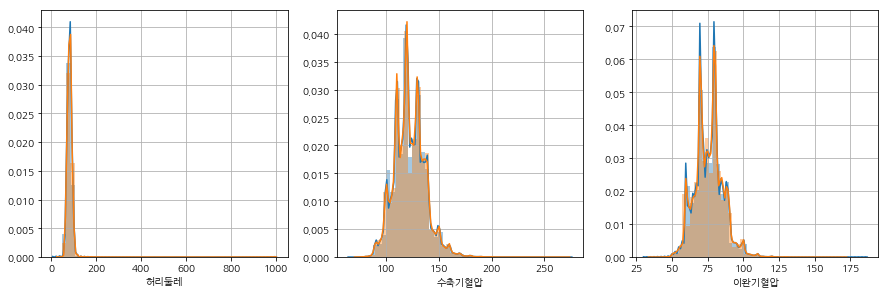

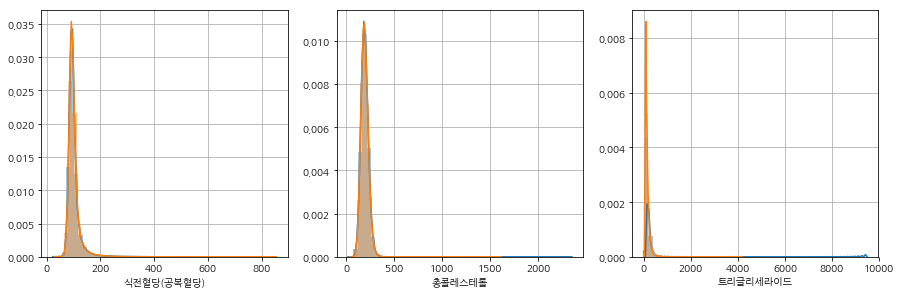

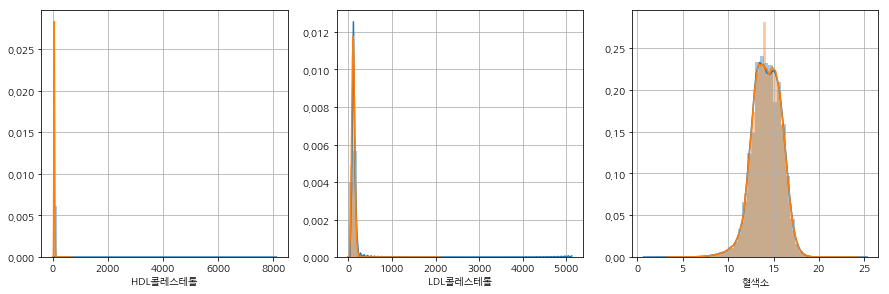

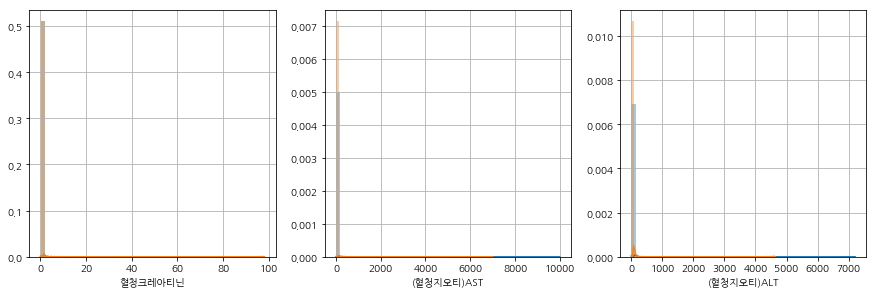

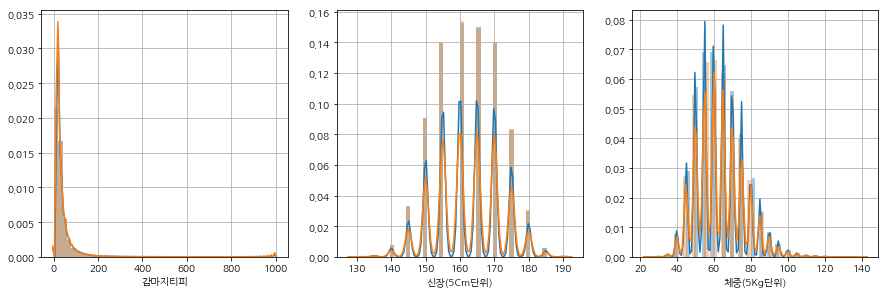

<Figure size 1080x720 with 0 Axes>

In [14]:
col_names = ['허리둘레','수축기혈압', 
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피','신장(5Cm단위)',
       '체중(5Kg단위)']
train_data_temp = train_data.drop(['치석'],axis=1).dropna()
test_data_temp = test_data.drop(['치석'],axis=1).dropna()
k = 1
fig = plt.figure(figsize=(15,10))
for col in col_names:
    if k <=3:
        a = fig.add_subplot(2,3,k+3)
        sns.distplot(train_data_temp[col], kde=True)
        sns.distplot(test_data_temp[col],kde=True)
    k = k+1
    if k==4:
        fig = plt.figure(figsize=(15,10))
        k=1



## Data Visualization (데이터 시각화)

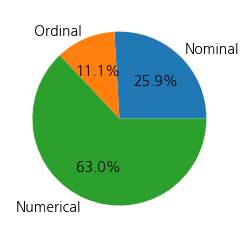

In [15]:
#Nominal, Ordinal, Numerical
counts = np.array([7,3,17])
labels = ["Nominal","Ordinal","Numerical"]

plt.pie(counts, labels = labels,autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

In [16]:
#봐야할 목록
#성별과 연령대 분포와 summary
#Correlation between 성별 & 연령대
#각 col 의 분포
#지역에 따른 연령과 성비, 지역에 따른 모든 다른 인자들
#구강검진수검여부 
#흡연상태와 나이 
#허리둘레&체중의 ratio 가 나이에 따라 다른가? (근육질이 나이가 어릴 수록 많을수도 있으니)

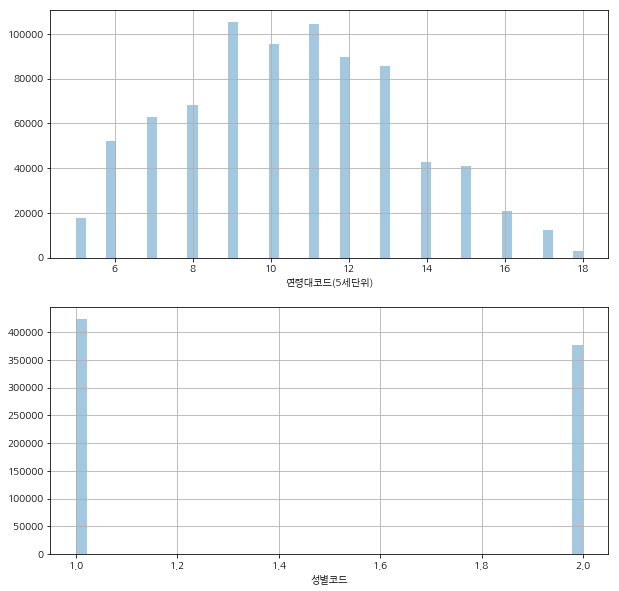

In [17]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(2,1,1)
#plt.add_subplot(2,1,figsize=(10,6))
sns.distplot(train_data['연령대코드(5세단위)'], kde = False)
#res = sns.distplot(test_data['연령대코드(5세단위)'], kde = True)
#data.columns
fig.add_subplot(2,1,2)
sns.distplot(train_data['성별코드'],kde = False)
#res = sns.distplot(test_data['성별코드'],kde = True

In [18]:
train_data['연령대코드(5세단위)'].value_counts().sort_index()

5      17777
6      52000
7      62707
8      68114
9     105206
10     95374
11    104229
12     89586
13     85463
14     42754
15     41049
16     20632
17     12327
18      2782
Name: 연령대코드(5세단위), dtype: int64

##### 5(20-24세) 미만은 없음. 

In [19]:
train_data['성별코드'].value_counts().sort_index()

1    424133
2    375867
Name: 성별코드, dtype: int64

##### 남성이 더 많음

## Correlation (상관관계)

#### Correlation 보기전에 Nominal (Y or N) 값들 1 과 0 으로 바꿔주기.

In [20]:
train_data = train_data.replace(['Y','N'],[1,0])

### Correlation between columns (spearman)

<Figure size 432x288 with 0 Axes>

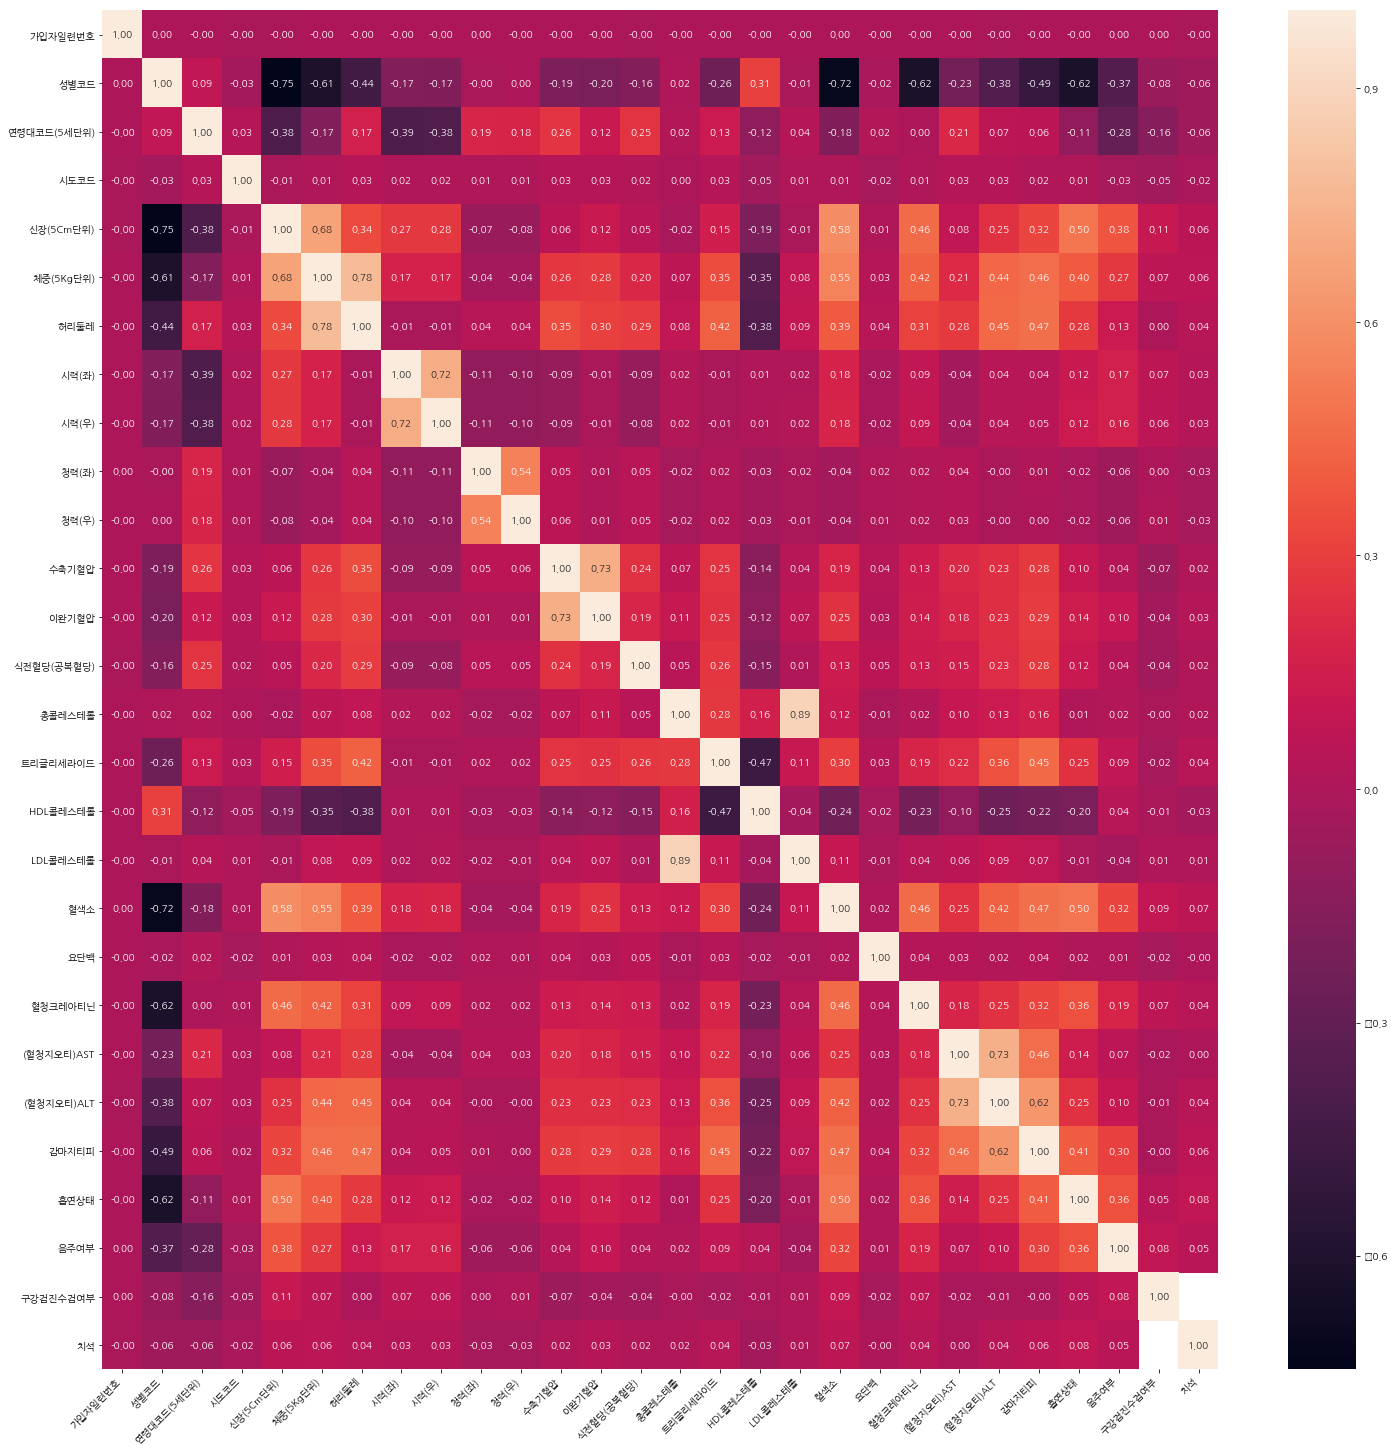

<Figure size 432x288 with 0 Axes>

In [21]:
#Correlation between columns
#pearson 은 linear 관계, spearman 은 monotonic 한 증감을 보기에 더 좋음
fig = plt.figure(figsize=(25,25))
corr_data = train_data.corr(method='spearman')
g = sns.heatmap(corr_data,annot=True, fmt = '.2f', )
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.figure()

###### 위 그래프에서 제일 상관관계가 있는 column 들 보기 

In [22]:
#Negative Correlation top 10
corr_mat = corr_data.unstack().sort_values()
corr_mat = pd.DataFrame(corr_mat).reset_index()
corr_mat.columns=['col1','col2','correlation']
corr_mat=corr_mat.iloc[:-2:2]
corr_mat.head(n=10)

,col1,col2,correlation
0,신장(5Cm단위),성별코드,-0.745055
2,성별코드,혈색소,-0.717150
4,성별코드,흡연상태,-0.621550
6,혈청크레아티닌,성별코드,-0.616826
8,성별코드,체중(5Kg단위),-0.612994
10,감마지티피,성별코드,-0.488923
12,HDL콜레스테롤,트리글리세라이드,-0.469620
14,성별코드,허리둘레,-0.443055
16,연령대코드(5세단위),시력(좌),-0.387969
18,연령대코드(5세단위),신장(5Cm단위),-0.384055


1.남자가 키가 더 큼. 

2.남자가 혈색소가 더 높음

3.남자가 더 많이 흡연

4.남자가 체중이 더 높음

5.나이가 많을수록 키가 작음

...

In [23]:
#Positive Correlation top 10
corr_mat = corr_data.unstack().sort_values(ascending=False)
corr_mat = pd.DataFrame(corr_mat).reset_index()
corr_mat.columns=['col1','col2','correlation']
corr_mat=corr_mat.iloc[:-2:2]
corr_mat = corr_mat[corr_mat['correlation']<1]
corr_mat.head(n=10)

,col1,col2,correlation
28,총콜레스테롤,LDL콜레스테롤,0.886893
30,허리둘레,체중(5Kg단위),0.780691
32,(혈청지오티)AST,(혈청지오티)ALT,0.731387
34,수축기혈압,이완기혈압,0.725283
36,시력(우),시력(좌),0.716797
38,신장(5Cm단위),체중(5Kg단위),0.679482
40,(혈청지오티)ALT,감마지티피,0.619370
42,혈색소,신장(5Cm단위),0.584985
44,체중(5Kg단위),혈색소,0.546846
46,청력(우),청력(좌),0.539188


허리둘레와 체중의 positive 상관관계 

In [24]:
# 성별코드와 연령대코드와 correlation 이 높은 순위 보기
corr_mat = corr_data.unstack()
corr_mat = pd.DataFrame(corr_mat).reset_index() 
corr_mat.columns=['col1','col2','correlation']

#성별 코드 
gender_corr = corr_mat.query("col1 == '성별코드' & col2 != '성별코드'")
gender_corr.sort_values(by=['correlation'],axis=0).head(n=10)

,col1,col2,correlation
32,성별코드,신장(5Cm단위),-0.745055
46,성별코드,혈색소,-0.717150
52,성별코드,흡연상태,-0.621550
48,성별코드,혈청크레아티닌,-0.616826
33,성별코드,체중(5Kg단위),-0.612994
51,성별코드,감마지티피,-0.488923
34,성별코드,허리둘레,-0.443055
50,성별코드,(혈청지오티)ALT,-0.375248
53,성별코드,음주여부,-0.368627
43,성별코드,트리글리세라이드,-0.260143


In [25]:
gender_corr.sort_values(by=['correlation'],axis=0,ascending=False).head(n=10)

,col1,col2,correlation
44,성별코드,HDL콜레스테롤,0.305757
30,성별코드,연령대코드(5세단위),0.085411
42,성별코드,총콜레스테롤,0.015076
28,성별코드,가입자일련번호,0.000895
38,성별코드,청력(우),0.000085
37,성별코드,청력(좌),-0.003279
45,성별코드,LDL콜레스테롤,-0.005684
47,성별코드,요단백,-0.017968
31,성별코드,시도코드,-0.030151
55,성별코드,치석,-0.056002


In [26]:
#연령 코드 
age_corr = corr_mat.query("col1 == '연령대코드(5세단위)' & col2 != '연령대코드(5세단위)'")
age_corr.sort_values(by=['correlation'],axis=0).head(n=10)

,col1,col2,correlation
63,연령대코드(5세단위),시력(좌),-0.387969
60,연령대코드(5세단위),신장(5Cm단위),-0.384055
64,연령대코드(5세단위),시력(우),-0.381327
81,연령대코드(5세단위),음주여부,-0.283743
74,연령대코드(5세단위),혈색소,-0.179063
61,연령대코드(5세단위),체중(5Kg단위),-0.172079
82,연령대코드(5세단위),구강검진수검여부,-0.158285
72,연령대코드(5세단위),HDL콜레스테롤,-0.116228
80,연령대코드(5세단위),흡연상태,-0.108180
83,연령대코드(5세단위),치석,-0.062640


흡연상태가 나이와 negative correlation 을 보인다. 
확인 필요.

pandas df.corr() 은 nan-friendly 기 때문에 치석과 구강검진수검여부의 nan 값들은 무시되었다. 
상관관계가 무시하면 안될 정도이니 무작정 column drop 대신 다른 방안이 있는지 확인 해볼것.

##### 나이가 들수록 흡연상태가 도로 준다는 말은 3(흡연) -> 2(금연) 으로 밖에 없다. 

In [27]:
age_corr.sort_values(by=['correlation'],axis=0,ascending=False).head(n=10)

,col1,col2,correlation
67,연령대코드(5세단위),수축기혈압,0.262973
69,연령대코드(5세단위),식전혈당(공복혈당),0.254207
77,연령대코드(5세단위),(혈청지오티)AST,0.206346
65,연령대코드(5세단위),청력(좌),0.189022
66,연령대코드(5세단위),청력(우),0.184893
62,연령대코드(5세단위),허리둘레,0.165312
71,연령대코드(5세단위),트리글리세라이드,0.127346
68,연령대코드(5세단위),이완기혈압,0.119798
57,연령대코드(5세단위),성별코드,0.085411
78,연령대코드(5세단위),(혈청지오티)ALT,0.067082


나이가 들 수록 허리 둘레는 늘지만 체중은 줄음.
하지만 위에서는 체중과 허리둘레의 positive correlation 을 찾았으므로 추가 확인필요와 feature engineering 때 재검토 필요.

### 제일 상관값이 낮은 값 (최소 절대값)

In [28]:
# 성별코드와 연령대코드와 correlation 이 낮은 순위 보기
corr_mat = corr_data.unstack()
corr_mat = pd.DataFrame(corr_mat).reset_index() 
corr_mat.columns=['col1','col2','correlation']

#성별 코드 
gender_corr = corr_mat.query("col1 == '성별코드' & col2 != '성별코드'")
#df.reindex(df.b.abs().sort_values().index)
gender_corr = gender_corr.reindex(gender_corr['correlation'].abs().sort_values().index)
#gender_corr.sort_values(by=['correlation'],key=abs,axis=0).head(n=10)
gender_corr.head(n=15)

,col1,col2,correlation
38,성별코드,청력(우),0.000085
28,성별코드,가입자일련번호,0.000895
37,성별코드,청력(좌),-0.003279
45,성별코드,LDL콜레스테롤,-0.005684
42,성별코드,총콜레스테롤,0.015076
47,성별코드,요단백,-0.017968
31,성별코드,시도코드,-0.030151
55,성별코드,치석,-0.056002
54,성별코드,구강검진수검여부,-0.075181
30,성별코드,연령대코드(5세단위),0.085411


In [29]:
#연령 코드 
age_corr = corr_mat.query("col1 == '연령대코드(5세단위)' & col2 != '연령대코드(5세단위)'")
age_corr = age_corr.reindex(age_corr['correlation'].abs().sort_values().index)
age_corr.head(n=15)

,col1,col2,correlation
56,연령대코드(5세단위),가입자일련번호,-0.001173
76,연령대코드(5세단위),혈청크레아티닌,0.003444
70,연령대코드(5세단위),총콜레스테롤,0.022802
75,연령대코드(5세단위),요단백,0.024200
59,연령대코드(5세단위),시도코드,0.026016
73,연령대코드(5세단위),LDL콜레스테롤,0.038381
79,연령대코드(5세단위),감마지티피,0.059005
83,연령대코드(5세단위),치석,-0.062640
78,연령대코드(5세단위),(혈청지오티)ALT,0.067082
57,연령대코드(5세단위),성별코드,0.085411


### 청력, LDL, 요단백, 치석, 구강검진수검여부 낮은 연관 확인.
청력, 치석 ,구강검진수검여부, 요단백은 Nominal 이라 낮을 수 있지만, LDL 은 Numerical 

# 요약

In [30]:
#최대 연관 feature 10개씩
#성별 코드 
gender_top = gender_corr.reindex(gender_corr['correlation'].abs().sort_values(ascending=False).index).head(10)
gender_cols = gender_top.col2
gender_top

,col1,col2,correlation
32,성별코드,신장(5Cm단위),-0.745055
46,성별코드,혈색소,-0.717150
52,성별코드,흡연상태,-0.621550
48,성별코드,혈청크레아티닌,-0.616826
33,성별코드,체중(5Kg단위),-0.612994
51,성별코드,감마지티피,-0.488923
34,성별코드,허리둘레,-0.443055
50,성별코드,(혈청지오티)ALT,-0.375248
53,성별코드,음주여부,-0.368627
44,성별코드,HDL콜레스테롤,0.305757


In [31]:
#연령대코드
age_top = age_corr.reindex(age_corr['correlation'].abs().sort_values(ascending=False).index).head(10)
age_cols = age_top.col2
age_top

,col1,col2,correlation
63,연령대코드(5세단위),시력(좌),-0.387969
60,연령대코드(5세단위),신장(5Cm단위),-0.384055
64,연령대코드(5세단위),시력(우),-0.381327
81,연령대코드(5세단위),음주여부,-0.283743
67,연령대코드(5세단위),수축기혈압,0.262973
69,연령대코드(5세단위),식전혈당(공복혈당),0.254207
77,연령대코드(5세단위),(혈청지오티)AST,0.206346
65,연령대코드(5세단위),청력(좌),0.189022
66,연령대코드(5세단위),청력(우),0.184893
74,연령대코드(5세단위),혈색소,-0.179063


## 변수들 시각화 및 Outlier 확인

### Non-numerical features

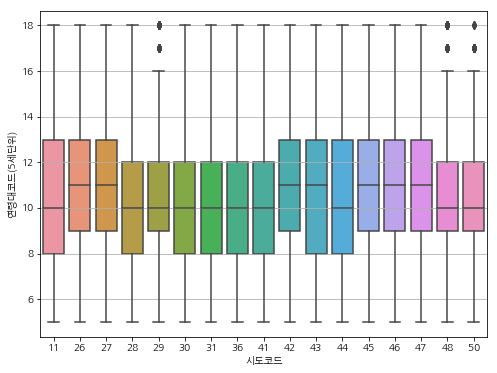

In [32]:
# 시도코드 
new_pd = pd.concat([train_data['연령대코드(5세단위)'],train_data['시도코드']],axis=1)
plt.figure(figsize=(8,6))
sns.boxplot(x='시도코드', y='연령대코드(5세단위)', data = new_pd)

지역별 큰 편차는 없어보임

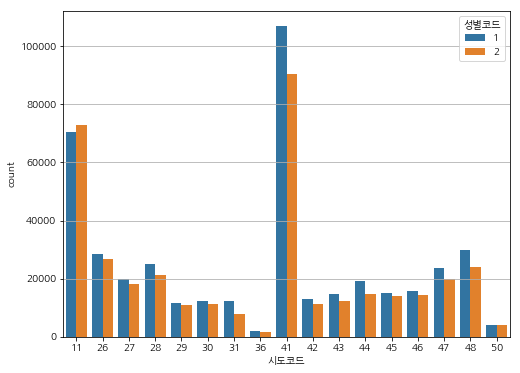

In [33]:
new_pd = pd.concat([train_data['성별코드'],train_data['시도코드']],axis=1)

plt.figure(figsize=(8,6))
sns.countplot(x='시도코드',hue = '성별코드',data = new_pd)

차이가 유의미한지 나중에 확인.

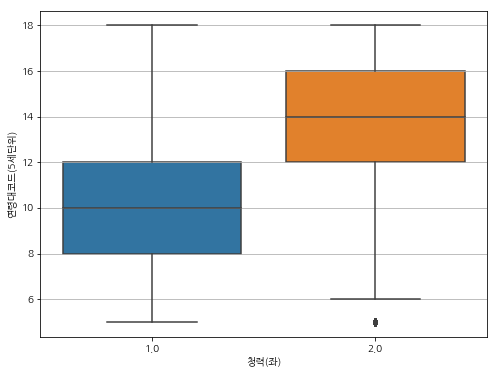

In [34]:
#청력
new_pd = pd.concat([train_data['연령대코드(5세단위)'],train_data['청력(좌)']],axis=1)
plt.figure(figsize=(8,6))
sns.boxplot(x='청력(좌)', y='연령대코드(5세단위)', data = new_pd)

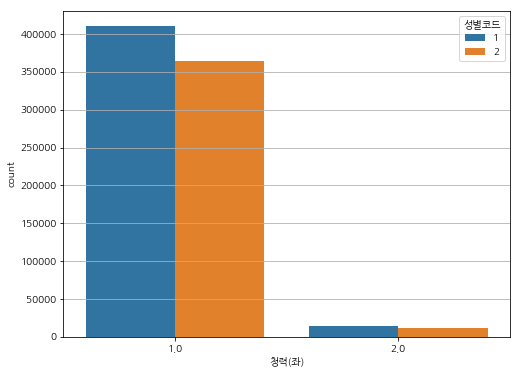

In [35]:
new_pd = pd.concat([train_data['성별코드'],train_data['청력(좌)']],axis=1)

plt.figure(figsize=(8,6))
sns.countplot(x='청력(좌)',hue = '성별코드',data = new_pd)

성별간 차이는 있지만 미미함(correlation 확인)

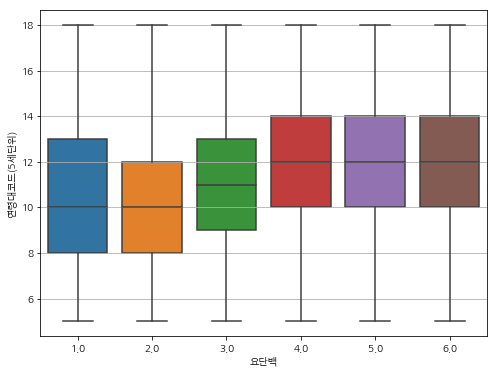

In [36]:
#요단백
new_pd = pd.concat([train_data['연령대코드(5세단위)'],train_data['요단백']],axis=1)
plt.figure(figsize=(8,6))
sns.boxplot(x='요단백', y='연령대코드(5세단위)', data = new_pd)

중간값은 증가중이지만 전체적으론 평이

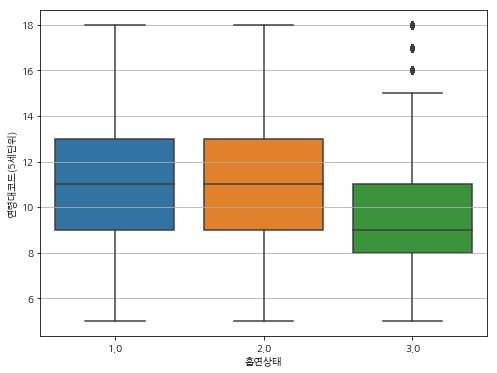

In [37]:
#흡연상태
new_pd = pd.concat([train_data['연령대코드(5세단위)'],train_data['흡연상태']],axis=1)
plt.figure(figsize=(8,6))
sns.boxplot(x='흡연상태', y='연령대코드(5세단위)', data = new_pd)

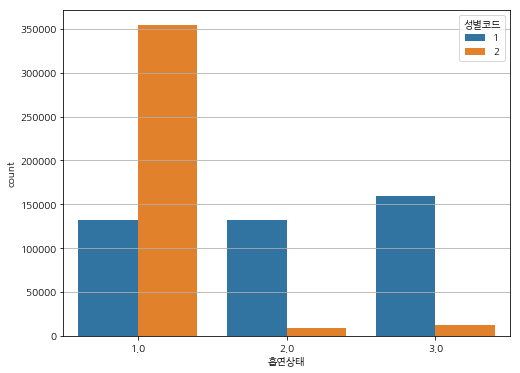

In [38]:
new_pd = pd.concat([train_data['성별코드'],train_data['흡연상태']],axis=1)

plt.figure(figsize=(8,6))
sns.countplot(x='흡연상태',hue = '성별코드',data = new_pd)

아마 age prediction 에서는 현재 흡연 중과 미흡연으로 나누고
gender prediction 에서는 흡연경험이 있다와 없다로 나누면 더 좋은 feature 가 될 듯함.

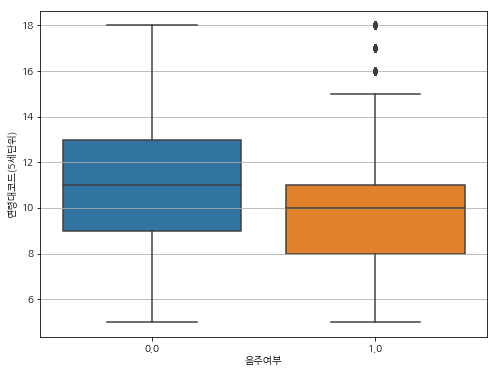

In [39]:
#음주여부
new_pd = pd.concat([train_data['연령대코드(5세단위)'],train_data['음주여부']],axis=1)
plt.figure(figsize=(8,6))
sns.boxplot(x='음주여부', y='연령대코드(5세단위)', data = new_pd)

나이가 들수록 절주를 하는 트렌드가 보인다.

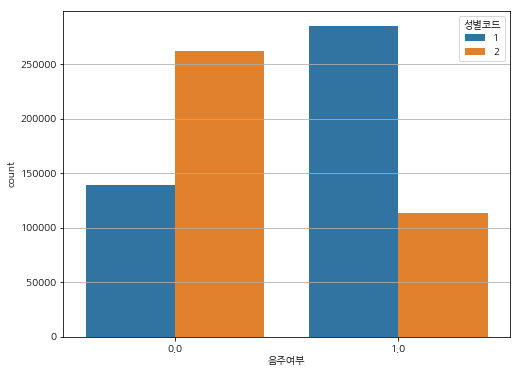

In [40]:
new_pd = pd.concat([train_data['성별코드'],train_data['음주여부']],axis=1)

plt.figure(figsize=(8,6))
sns.countplot(x='음주여부',hue = '성별코드',data = new_pd)

남녀간의 음주차이도 확연하다

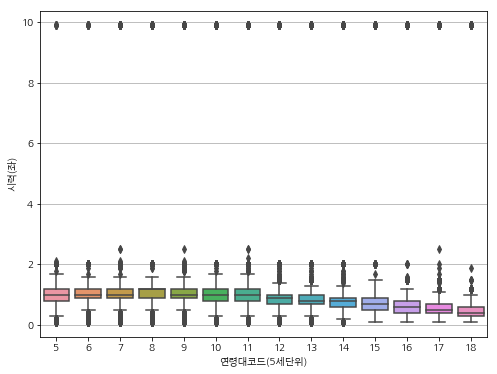

In [41]:
#시력
new_pd = pd.concat([train_data['연령대코드(5세단위)'],train_data['시력(좌)']],axis=1)
plt.figure(figsize=(8,6))
sns.boxplot(y='시력(좌)', x='연령대코드(5세단위)', data = new_pd)

연령대 별로 점점 감소하는 트렌드를 보여주지만 9.9(실명) 의 outlier 들도 확인. 
나중에 처리 필요.

구강검진수검 받은 수 :  961095
그 중 남성 수 :  553665


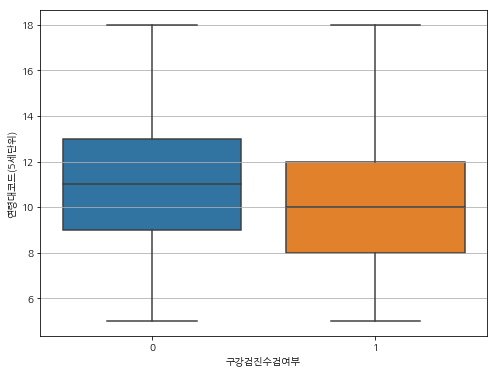

In [42]:
#구강검진수검여부
new_pd = pd.concat([train_data['연령대코드(5세단위)'],train_data['구강검진수검여부'],train_data['성별코드']],axis=1)
plt.figure(figsize=(8,6))
sns.boxplot(x='구강검진수검여부', y='연령대코드(5세단위)', data = new_pd)

tested = new_pd[new_pd['구강검진수검여부']==1]
print("구강검진수검 받은 수 : ", tested.size)
print("그 중 남성 수 : ", tested[tested['성별코드']==1].size)


구강검진을 받은 쪽이 나이대가 더 어린 결과가 보이지만 큰 차이는 없다. (상관계수도 매우 낮음)

성별 간도 차이는 조금 있지만 상관관계가 유의미하진 않음 (corr 참조)

### 나머지 feature Visualization

#### 연령대코드

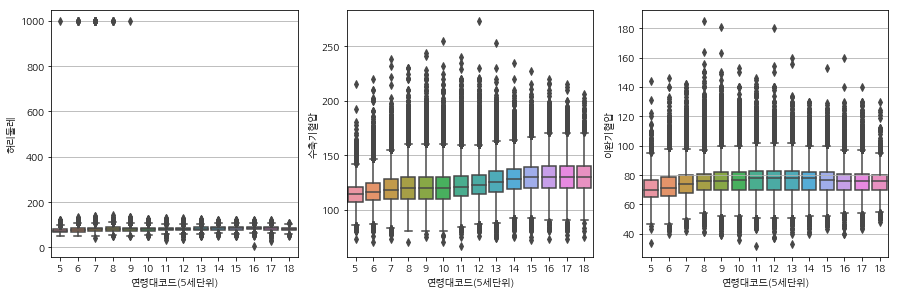

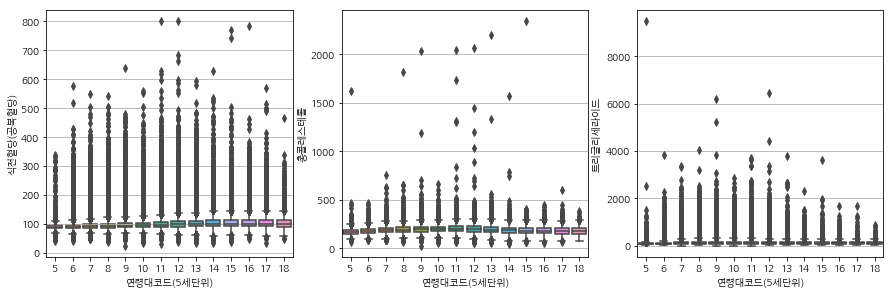

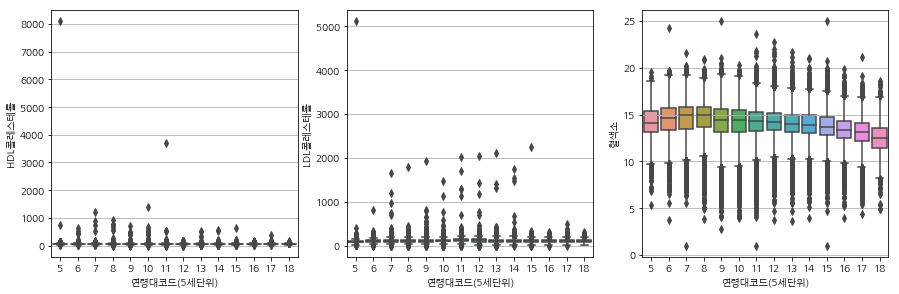

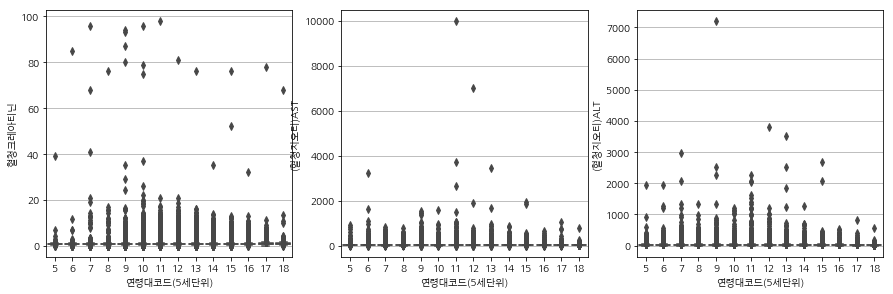

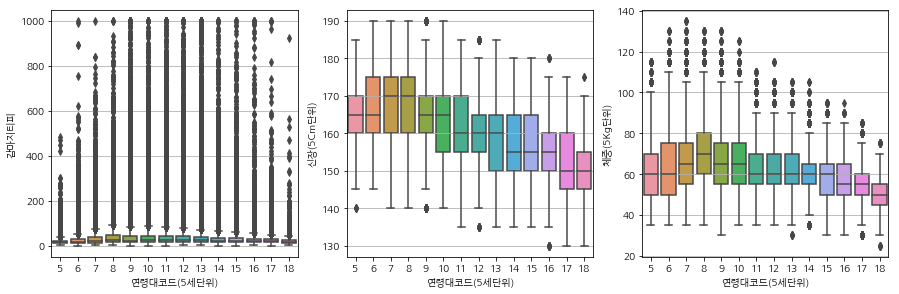

<Figure size 1080x720 with 0 Axes>

In [43]:
col_names = ['허리둘레','수축기혈압', 
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피','신장(5Cm단위)',
       '체중(5Kg단위)']

k = 1
fig = plt.figure(figsize=(15,10))
for col in col_names:
    if k <=3:
        a = fig.add_subplot(2,3,k+3)
        sns.boxplot(data=train_data, y=col, x='연령대코드(5세단위)')
    k = k+1
    if k==4:
        fig = plt.figure(figsize=(15,10))
        k=1



##### 성별코드

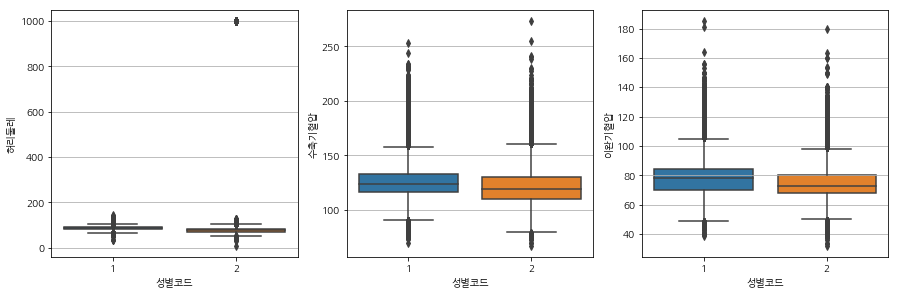

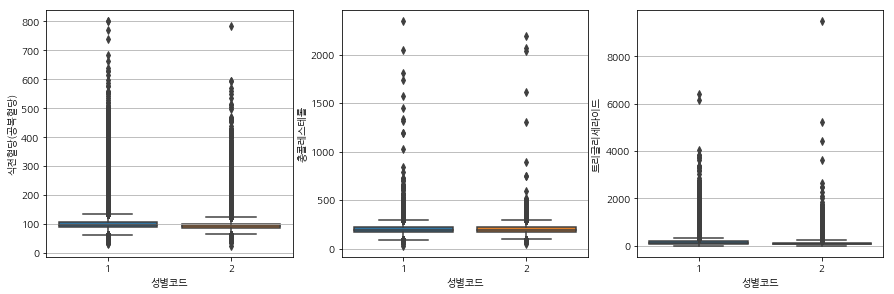

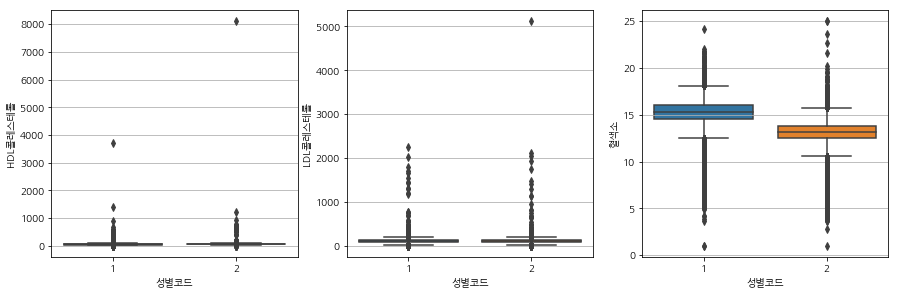

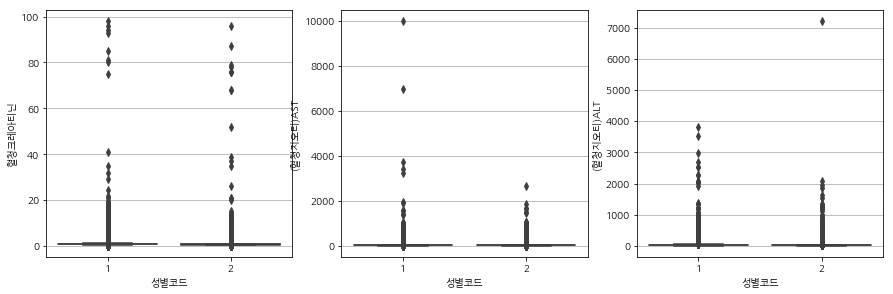

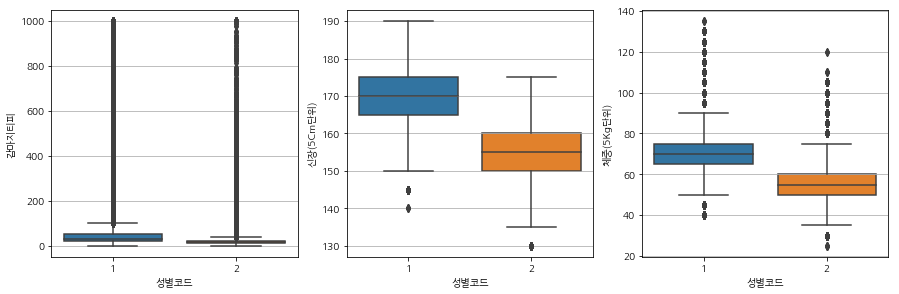

<Figure size 1080x720 with 0 Axes>

In [44]:
col_names = ['허리둘레','수축기혈압', 
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피','신장(5Cm단위)',
       '체중(5Kg단위)']

k = 1
fig = plt.figure(figsize=(15,10))
for col in col_names:
    if k <=3:
        a = fig.add_subplot(2,3,k+3)
        sns.boxplot(data=train_data, y=col, x='성별코드')
    k = k+1
    if k==4:
        fig = plt.figure(figsize=(15,10))
        k=1


모아서 보니 outlier 들을 볼 수 있다. 

## Outlier 체크

상관관계값이 높던 feature 들 위주로 보았다.

#### 허리둘레

In [45]:
data_check = train_data.sort_values(by=['허리둘레'], ascending = False)
data_check.head(20)
train_data.groupby('허리둘레').size()

허리둘레
8.0       1
30.0      1
32.0      2
35.0      2
40.0      1
42.0      1
43.0      1
46.6      1
48.0      1
49.0      1
50.0      4
50.3      1
50.5      2
51.0     17
51.2      1
51.5      3
51.6      1
51.8      1
52.0     29
52.1      1
52.4      1
52.5      1
52.6      1
53.0     42
53.1      2
53.2      2
53.4      1
53.5      1
53.6      1
53.8      1
         ..
123.1     1
123.2     1
123.3     1
123.4     2
123.5     2
123.8     1
124.0    14
124.1     1
124.2     2
124.5     2
125.0    15
126.0     8
126.5     2
126.6     1
127.0     9
127.3     1
128.0     7
129.0     7
129.6     1
130.0     1
130.5     1
131.0     2
132.0     2
133.0     1
134.0     2
136.0     2
138.0     1
140.0     1
145.0     1
999.0    49
Length: 724, dtype: int64

145 초과는 999 처리 된 듯 하다.  170 정도로 고치자.

#### 시력
시력은 9.9 가 실명이지만 값들의 상관관계를 위해 9.9 -> -1 로 변경하자

#### 혈당
혈당수치는 전날 공복 여부와 정말로 심한 당뇨 등 7~800이 나올 수도 있다고 한다
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=okdiabetes&logNo=221152032377


[정상치] 70~99 ㎎/ℓ 

8시간 이상 공복 후 측정한 혈당이 126 mg/dL 이상인 경우 당뇨병으로 진단이 됩니다. 당뇨병의 증상이 없다면 한번 더 측정한 후 두 번의 결과를 보고 판정을 내리는 것이 정확합니다. 공복혈당이 100-125 mg/dl 사이로 나온다면 이것도 정상이 아니고 공복혈당장애(impaired fasting glucose)로 분류합니다. 이는 당뇨병 전단계 또는 당뇨병이 생길 위험도가 높은 상태인데 그 위험도는 공복혈당장애가 있는 사람이 1년이 지나면 약 10%에서 당뇨병이 생긴다고 합니다.
https://www.kslm.org/sub01/sub03.html

일단 126 이상이면 당뇨병으로 분류하고 연관관계를 보자. 

1    40638
2    21156
Name: 성별코드, dtype: int64


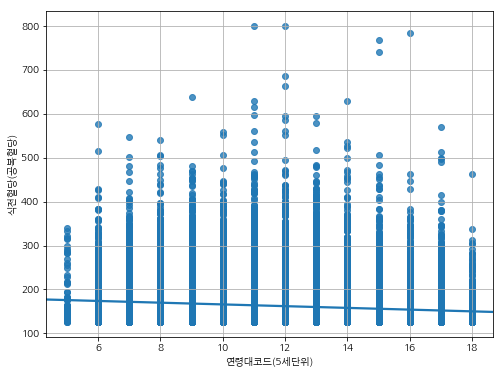

In [46]:
diabetes = train_data[train_data['식전혈당(공복혈당)'] >= 126]
print(diabetes['성별코드'].value_counts())
plt.figure(figsize=(8,6))
sns.regplot(y='식전혈당(공복혈당)', x='연령대코드(5세단위)', data =diabetes)



나이가 들수록 median 혈당은 늘지만 당뇨병 이상만 모아보면 비슷한 추세를 보이는 것을 보아 검사 전 공복 여부와 관련이 있는 듯 하다. 


성별은 남성이 거의 두배로 많았다. 

조사해보니 과연 좋은 insight 를 얻은 듯 하다. 
40대남성 당뇨병 유병률, 같은 연령대 여성의 2배
https://www.mk.co.kr/news/it/view/2018/08/529463/

유의미한 수치인지 나중에 feature engineering 을 통해 알아봐야겠다.

#### 콜레스테롤

트라이글리세라이드, HDL, LDL 에서 outlier 확인 필요

In [47]:
trig = train_data.sort_values(by='트리글리세라이드',ascending=False)
#print(trig.iloc[0])
print(trig.iloc[1])
#print(trig.iloc[2])
#trig.iloc[2000]
#0번은 모든 콜레스테롤이 이상이므로 기계 이상이나 기입 이상
#1,2번은 중성지방만 높으므로 공복이 아닐 때 측정함. 

가입자일련번호        106313.0
성별코드                1.0
연령대코드(5세단위)        12.0
시도코드               27.0
신장(5Cm단위)         165.0
체중(5Kg단위)          55.0
허리둘레               79.0
시력(좌)               0.6
시력(우)               0.6
청력(좌)               1.0
청력(우)               1.0
수축기혈압             150.0
이완기혈압              90.0
식전혈당(공복혈당)        279.0
총콜레스테롤           1030.0
트리글리세라이드         6430.0
HDL콜레스테롤           40.0
LDL콜레스테롤           39.0
혈색소                16.3
요단백                 1.0
혈청크레아티닌             0.5
(혈청지오티)AST         19.0
(혈청지오티)ALT         16.0
감마지티피             477.0
흡연상태                3.0
음주여부                1.0
구강검진수검여부            1.0
치석                  NaN
Name: 106312, dtype: float64


중성지방(트리글리세라이드)은 공복이 아닐 때 검사시, 5~10배 상승 가능. 
https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=82

총콜레스테롤 = HDL + LDL + 중성지방/5 

https://www.kslm.org/sub01/sub03_4.html


당뇨병을 앓고 있거나 혈당이 조절 범위를 벗어나면 중성지방의 수치는 매우 높을 수 있습니다.
(혈당과 연관 확인 필요)


일단 총콜레스테롤 최대 값이 2500 이 채 안되므로, 
HDL , LDL 이 2500 이 넘은 outlier 들은 삭제 필요

중성지방은 2500*5 까지 가능한 값이므로 남겨둠. 

##### 혈청크레아티닌

정상 = 남성은 0.61~1.04mg/dL 이며, 여성의 경우는 0.47~0.79mg/dL입니다


8이상은 투석 치료가 필요한 수준이라고 한다.
https://m.blog.naver.com/radotail/222035744495


통계청 - 연령별 혈청크레아티닌 분포 현황 
https://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=DT_35007_N079
여성이 평균적으로 낮음 확인

##### 간수치


ALT 와 AST 는 간수치이다. 
성별에서 ALT 의 연관이 높게 나왔고, 
연령대에서 AST 의 연관이 높게 나왔다. 

추후에 쓸 가능성이 높음. 


간 수치
https://blog.naver.com/molaid/221639056036
정상: 0 ~ 40
경도: 40 ~ 200 
중등도: 200 ~ 400
중증 : 400~ 

#### 감마지티피

감마 지티피(γ-GTP)란 간, 신장, 췌장, 비장, 심장, 뇌에 분포하는 효소다. 

간, 담도에 질환 있으면 이상치를 보임.
https://www.hidoc.co.kr/healthstory/news/C0000662436
- 정상 소견
· 신생아: 약 100 IU/L
· 남성: 11~63 IU/L
· 여성: 8~35 IU/L

남녀간 정상 범위 격차가 있음 (간수치보다 훨씬 더 확연)

600이상의 값도 가능하므로 outlier 처리는 하지 않음
https://zesicpapa.tistory.com/68
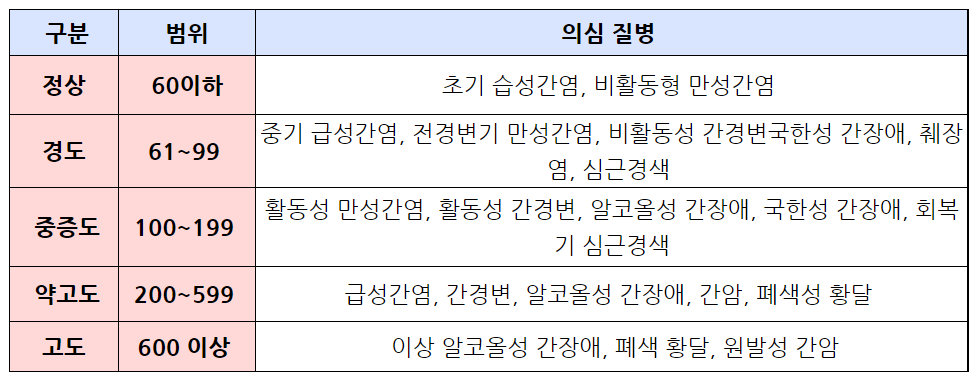

## 결측치 처리 (Handlinig Missing Data)

In [48]:
missing = train_data.isna().sum().sort_values(ascending=False)
missing_per = (train_data.isna().sum()/train_data.isna().count() * 100).sort_values(ascending=False)
#missing_per = missing_per.to_frame()
#missing_per = missing_per.reset_index().rename(columns={"index": "col",0:"percent"})
#missing_per = missing_per.rename(columns={'col','percentage'})

print(missing)
print(missing_per)
#sns.barplot(x='col',y='percent',data = missing_per)
#missing_per.col
#missing_per

치석             497226
요단백              3726
LDL콜레스테롤         2348
음주여부              431
허리둘레              214
시력(우)             150
시력(좌)             143
청력(좌)             128
청력(우)             126
흡연상태              125
혈색소                43
혈청크레아티닌            38
감마지티피              37
HDL콜레스테롤           37
트리글리세라이드           37
식전혈당(공복혈당)         36
총콜레스테롤             36
(혈청지오티)AST         36
(혈청지오티)ALT         36
수축기혈압              14
이완기혈압              13
구강검진수검여부            0
체중(5Kg단위)           0
신장(5Cm단위)           0
시도코드                0
연령대코드(5세단위)         0
성별코드                0
가입자일련번호             0
dtype: int64
치석             62.153250
요단백             0.465750
LDL콜레스테롤        0.293500
음주여부            0.053875
허리둘레            0.026750
시력(우)           0.018750
시력(좌)           0.017875
청력(좌)           0.016000
청력(우)           0.015750
흡연상태            0.015625
혈색소             0.005375
혈청크레아티닌         0.004750
감마지티피           0.004625
HDL콜레스테롤        0.004625
트리글리세라이드        0.004

치석 column 이 매우 결손치가 많다. 
구강검진수검여부와 연관관계를 보자


In [49]:
missing_teeth = train_data[train_data['치석'].isna()]
print("치석 결손치 총 합: " , missing_teeth.size)
#구강검진 받음
taken = missing_teeth[missing_teeth['구강검진수검여부']==1]
print("그 중에 구강검진받음: " , taken.size)
#안받음
print("그 중에 구강검진 안받음: ", missing_teeth.size - taken.size)

mouth_test = train_data[train_data['구강검진수검여부']==0]
print("구강검진 안받은 사람 수 : ",mouth_test.size)

치석 결손치 총 합:  13922328
그 중에 구강검진받음:  492548
그 중에 구강검진 안받음:  13429780
구강검진 안받은 사람 수 :  13429780


결론 : 구강검진을 안받은 사람이 많아서 치석값이 결손치가 생긴 것이다. 
치석 column 은 채울 방법이 없으므로 drop 확정. 

나머지 missing value 들도 수가 매우 적어 row drop 결정. 

## Data Preprocessing

#### Data Cleaning

해야 할 목록

값 조정
- 시력 (좌,우) / 9.9(실명) -> -1
- 허리둘레 / 999(145 초과) -> 170 
- 나이 / 10대로 나눠서 끊기 (과제 지침)
- Y or N 값들을 1,2로 바꿈 

값 삭제 
- NaN  값 포함 row 들 삭제 / 수가 매우 작음
- LDL , HDL / 2500 이상 삭제 (총 콜레스테롤 값 확인 결과 2500 이상 불가능 / 기계오류 의심)
- (시간 남으면) 총콜레스테를 수치와 수식 기준으로 중성지방, LDL, HDL 이 너무 off 면 row 삭제

## Feature Engineering

해야 할 목록

column 삭제
- 치석 / 결손치 너무 많고 채울 방법 없음 (구강검진검수를 안받아서이므로)
- 구강검진수검여부 / correlation 너무 낮음
- 시도코드 / 물론 categorical data 기 때문에 correlation 값이 상관없지만, 그래프를 봤을 때 성별과 연령대에 차이가 아주 미미함. 
one-hot encoding 하기엔 너무 지역이 많음.
- 총콜레스테롤 / Collinearity 생성 가능성 있음 (나머지 콜레스테롤로 계산 가능)

column 통합
- 시력(좌,우) 평균으로 시력 column 생성
- 청력(좌,우) 평균 혹은 이상 유무로 청력 column 생성
- ALT 와 AST 평균으로 간수치 column 생성
- 수축기혈압 이완기혈압 평균으로 평균혈압 column 생성
- 수축기혈압과 이완기혈압 차로 혈압차 column 생성(확인필요)

"수축기·이완기 혈압 차이 갑자기 변하면 대사증후군 주의"
https://www.joongang.co.kr/article/21657194#home

Encoding
- 흡연여부 one-hot encoding / 대소관계 없으므로 

feature engineering 
- 허리 둘레와 체중 / PCA 로 연관관계가 보이면 feature 생성
- 콜레스테롤 3종의 연관 / 3종의 특이점으로 각종 병 예측 가능, PCA
- 혈당과 중성지방 수치 / 둘 다 높으면 당뇨 확률 상승, PCA 로 보기
- 혈당에서 당뇨와 아님으로 나눠보기 / Mutual Information 으로 feature utility 점수 계산 
- (시간있으면) 지역 값을 validation set 의 각 지역당 평균 연령 or 성비로 바꿔보고 성능 계산해보기 
- 흡연상태를 연령대에서는 현재 흡연과 아님으로 / 성별에서는 흡연 경험이 있다 없다로 나누기

In [7]:
#Dataframe Preprocessing function (data cleaning)
def preprocess(data_in):
    dt=data_in.copy() #기존 데이터 유지
    dt = dt.sample(frac=1).reset_index(drop=True) #row 전체 shuffle
    #불필요 columns drop
    dt.drop([
        '치석',
        '시도코드',
        '구강검진수검여부',
        '가입자일련번호',
    ],axis=1,inplace=True)
    
    #값 삭제 
    #NaN  값 포함 row 들 삭제 / 수가 매우 작음
    dt.dropna(inplace=True) #800,000 -> 792,996
    #LDL , HDL / 2500 이상 삭제 (총 콜레스테롤 값 확인 결과 2500 이상 불가능 / 기계오류 의심)
    dt.drop(dt[dt['LDL콜레스테롤']>=2500].index,inplace=True)
    dt.drop(dt[dt['HDL콜레스테롤']>=2500].index,inplace=True) #row 2개 삭제됨
    #(시간 남으면) 총콜레스테를 수치와 수식 기준으로 중성지방, LDL, HDL 이 너무 off 면 row 삭제
    
    #데이터 값 조정
    #시력 조정
    dt.loc[dt["시력(좌)"]==9.9,"시력(좌)"]=-1
    dt.loc[dt["시력(우)"]==9.9,"시력(우)"]=-1
    #허리둘레 / 999(145 초과) -> 170 
    dt.loc[dt["허리둘레"]==999,"허리둘레"]=170
    #나이 / 10대로 나눠서 끊기 (과제 지침)
    dt['연령대코드(5세단위)'] = dt['연령대코드(5세단위)'].apply(lambda x : int((x-1)/2) * 10)
    dt=dt.rename(columns={'연령대코드(5세단위)':'연령(10세)'})
    #Y or N 값들을 1, 2 로 바꿈 / 청력기준과 동일
    dt = dt.replace(['Y','N'],[1,2])
   
    
    
    return dt

#adding my custom features
def feat_eng(X):
    dt=X.copy()
    
    
    #column 통합
    #시력(좌,우) 평균으로 시력 column 생성
    dt["시력"]=(dt["시력(좌)"]+dt["시력(우)"])/2
    #청력(좌,우) 평균 (혹은 이상 유무)으로 청력 column 생성
    dt["청력"]=(dt["청력(좌)"]+dt["청력(우)"])/2
    #ALT 와 AST 평균으로 간수치 column 생성
    dt["간수치"]=(dt["(혈청지오티)ALT"]+dt["(혈청지오티)AST"])/2
    #수축기혈압 이완기혈압 평균으로 혈압 column 생성
    dt["혈압평균"]=(dt["수축기혈압"]+dt["이완기혈압"])/2
    #수축기혈압과 이완기혈압 차로 혈압차 column 생성
    dt["혈압차"]=dt["수축기혈압"]-dt["이완기혈압"]
    #당뇨인지 아닌지 (혈당 >=126)
    dt["당뇨"]= np.where(dt["식전혈당(공복혈당)"]>=126,1,0)
    #실명인지 아닌지
    dt["실명"]=np.where(((dt["시력(좌)"] == -1)^(dt["시력(우)"]== -1)),1,0)
     #흡연 경험이 있는지 (1 == 펴봄)
    dt["흡연경험"]=np.where(dt["흡연상태"]==1,0,1)
    #현재 흡연 중인지 (1==흡연중)
    dt["흡연중"]=np.where(dt["흡연상태"]==3,1,0)
    #흡연을 one-hot-encoding 해준다.
    dt = pd.get_dummies(data=dt,columns=['흡연상태'],prefix='흡연상태')
    return dt

## Modeling & 중간점검 (비교점 생성)

In [8]:
#train_data 리셋
train_data = data.loc[data['가입자일련번호']%5!=0]

#preprocessing
train_dt = preprocess(train_data)
train_dt = train_dt.reset_index().drop('index',axis=1)

#print(train_dt.shape)
#print(train_dt.columns)
#print(train_dt.iloc[0])

#X, y split
train_X = train_dt.drop(['성별코드','연령(10세)'],axis=1)
train_gen = train_dt['성별코드']
train_age = train_dt['연령(10세)']

train_X_cust = feat_eng(train_X)

In [9]:
#top correlation features for gen, age
train_X_gen = train_X[gender_top['col2'].head(5)]
print(train_X_gen.columns)
train_X_age = train_X[age_top['col2'].head(5)]
print(train_X_age.columns)

NameError: name 'gender_top' is not defined

# 비교점 생성 (feature engineering 전 raw data)

## Regression 

### Random Forest

In [54]:
rf_pipeline = Pipeline(steps=[('model',
                               RandomForestRegressor(n_estimators=20,
                                                     random_state=0, n_jobs=-1))
                             ])

rmse = cv_rmse(rf_pipeline,train_X,train_age)
print('Age: RandomForest rmse', rmse.mean())
rmse = cv_rmse(rf_pipeline,train_X,train_gen)
print('Gender: RandomForest rmse', rmse.mean())

Age: RandomForest rmse 9.938940360661022
Gender: RandomForest rmse 0.17152251024651816


In [55]:
# X_train, X_valid, y_train, y_valid = train_test_split(train_X,train_age,train_size=0.8,
#                                                       test_size=0.2,random_state=0)
# my_pipeline.fit(X_train,y_train)
# preds = my_pipeline.predict(X_valid)
# score = np.sqrt(mean_squared_error(y_valid, preds))
# print('RMSE : ', score)

### XGBoost

In [56]:
xgb_pipeline = Pipeline(steps=[('model',
                               XGBRegressor(n_estimators=20,
                                                     random_state=0))
                             ])
#my_pipeline = Pipeline(steps=[('model',
#                               XGBRegressor(n_estimators=10,
#                                            learning_rate=0.06,
#                                            random_state=0))
#                             ])

rmse = cv_rmse(xgb_pipeline,train_X,train_age)
print('Age: XGBoost rmse: ', rmse.mean())
rmse = cv_rmse(xgb_pipeline,train_X,train_gen)
print('Gender: XGBoost rmse: ', rmse.mean())

Age: XGBoost rmse:  9.708402809383836
Gender: XGBoost rmse:  0.1714693977962915


### Lasso

In [57]:
print('Age:')
#Robust Scaler is better for data with outliers (focus on 1st ~ 3rd quartile)
lsr_pipeline = Pipeline(steps=[
                            ('scaler',RobustScaler()),
                            ('model',LassoCV()) #default setting
                             ])

rmse = cv_rmse(lsr_pipeline,train_X,train_age)
print('Lasso with Robustscaler: ', rmse.mean())

lss_pipeline = Pipeline(steps=[
                            ('scaler',StandardScaler()),
                            ('model',LassoCV()) #default setting
                             ])

rmse = cv_rmse(lss_pipeline,train_X,train_age)
print('Lasso with StandardScaler: ', rmse.mean())

print('Gender:')
rmse = cv_rmse(lsr_pipeline,train_X,train_gen)
print('Lasso with Robustscaler: ', rmse.mean())

Age:
Lasso with Robustscaler:  10.772758696124654
Lasso with StandardScaler:  10.770857009836975
Gender:
Lasso with Robustscaler:  0.2654547967786009


### Ridge

In [58]:
print('Age:')
rg_pipeline = Pipeline(steps=[
                            ('scaler',RobustScaler()),
                            ('model',RidgeCV()) #default setting
                             ])

rmse = cv_rmse(rg_pipeline,train_X,train_age)
print('Ridge rmse: ', rmse.mean())

print('Gender:')
rmse = cv_rmse(rg_pipeline,train_X,train_gen)
print('Ridge rmse: ', rmse.mean())

Age:
Ridge rmse:  10.772852685843489
Gender:
Ridge rmse:  0.26543641115575783


## Classification

### KNN Classifier

In [60]:
print('Age:')
knn_pipeline = Pipeline(steps=[
                            ('scaler',RobustScaler()),
                            ('model',KNeighborsClassifier()) #default setting
                             ])

mae = cv_mae(knn_pipeline, train_X_age, train_age)
print('KNN mae: ', mae.mean())

print('Gender:')
mae = cv_mae(knn_pipeline, train_X_gen, train_gen)
print('KNN mae: ', mae.mean())

Age:
KNN mae:  11.530905002841983
Gender:
KNN mae:  0.0485198514766784


### XGB Classifier

In [34]:
le_age = preprocessing.LabelEncoder()
le_age.fit([20, 30, 40, 50, 60, 70, 80])
train_age_le = le_age.transform(train_age)

le_gen = preprocessing.LabelEncoder()
le_gen.fit([1,2])
train_gen_le = le_gen.transform(train_gen)

In [62]:
xgbc_pipeline = Pipeline(steps=[('model',
                               XGBClassifier(n_estimators=20,
                                                     random_state=0))
                             ])



rmse = cv_mae(xgbc_pipeline,train_X,train_age_le)
print('Age: XGBoost mae: ', rmse.mean())
rmse = cv_mae(xgbc_pipeline,train_X,train_gen_le)
print('Gender: XGBoost mae: ', rmse.mean())

Age: XGBoost mae:  0.7579492997139529
Gender: XGBoost mae:  0.035980049997587596


## LogisticRegression

In [63]:
logr_pipeline = Pipeline(steps=[('scaler',RobustScaler()),
                            ('model',LogisticRegressionCV(cv=2,random_state=0,n_jobs=-1))])

print('Gender:')
mae = cv_mae(logr_pipeline,train_X,train_gen)
print('Log Reg rmse: ', mae.mean())

Gender:
Log Reg rmse:  0.04264717907654547


## Mutual Information (feature utility metric)

Correlation 은 linear relationship 만 본다면, Mutual Information 은 모든 상관 관계 찾기 가능. 

feature 의 유용성 검사.

(이 feature 의 값을 알면 target 의 uncertainty 가 얼마나 줄어드나?)
I(X ; Y) = H(X) – H(X | Y) MI = Entropy of X - Entropy of X given Y

하지만 NaN 값이 있으면 작동하지 않음. (Data Cleaning 다음에 보기)

In [10]:
#from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    #X1 = X_in.copy()
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X1)
    
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    print("mi score for regression: ",mi_scores)
    
    #mi_scoress = mutual_info_classif(X, y)
    #mi_scoress = pd.Series(mi_scoress, name="MI Scores", index=X.columns)
    #mi_scoress = mi_scoress.sort_values(ascending=False)
    #print("mi score for classification: ",mi_scoress)
    return mi_scores#, mi_scoress

In [11]:
#MI score for classification
def make_mi_scores_c(X, y):
    #X1 = X_in.copy()
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X1)
    
    mi_scoress = mutual_info_classif(X, y)
    mi_scoress = pd.Series(mi_scoress, name="MI Scores", index=X.columns)
    mi_scoress = mi_scoress.sort_values(ascending=False)
    print("mi score for classification: ",mi_scoress)
    return mi_scoress


MI 점수가 높을수록 Target 의 uncertainty 를 줄이는 유용한 feature 이므로 뒤에 새로 추가하는 feature 의 utility 와 존재하는 feature 들의 utility 보고 모델링에 쓸 feature들을 선택하자.

## Feature Engineering (PCA)

Principal component Analysis 를 통해 feature 간의 숨은 연관성을 찾고, 새로운 feature 를
생성하고, 차원을 축소하자.

In [12]:
#from sklearn.decomposition import PCA
def calcPCA(X):
    X1 = X.copy()
    #standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X1)
    
    #PC creation 
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    #variance
    X_pca_var = pca.explained_variance_ratio_
    
    #convert to pd.DataFrame
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca =  pd.DataFrame(X_pca, columns=component_names)
    
    #loadings (계수)
    loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
    )
    
    return X_pca, loadings, X_pca_var

### 콜레스테롤 (LDL/HDL/트리글리세라이드)

In [13]:
#콜레스테롤
features = ["트리글리세라이드","HDL콜레스테롤","LDL콜레스테롤"]
train_X_col = train_X[features]
res = calcPCA(train_X_col)

In [14]:
#기존 데이터에 feature 들 추가
col_pca=res[0]
col_pca.columns=['col_PC1','col_PC2','col_PC3']
train_X_cust = pd.concat([train_X_cust, col_pca],axis=1)

col_loadings=res[1]

col_var = res[2]
train_X_cust.columns

Index(['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
       'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT',
       '감마지티피', '음주여부', '시력', '청력', '간수치', '혈압평균', '혈압차', '당뇨', '실명', '흡연경험',
       '흡연중', '흡연상태_1.0', '흡연상태_2.0', '흡연상태_3.0', 'col_PC1', 'col_PC2',
       'col_PC3'],
      dtype='object')

### 허리 둘레와 체중

In [15]:
features = ["허리둘레","체중(5Kg단위)"]
train_X_ww = train_X[features]
res = calcPCA(train_X_ww)

In [16]:
#기존 데이터에 feature 들 추가
ww_pca=res[0]
ww_pca.columns=['ww_PC1','ww_PC2']
train_X_cust = pd.concat([train_X_cust, ww_pca],axis=1)

ww_loadings=res[1]
train_X_cust.columns
ww_var = res[2]

### 혈당과 중성지방

In [17]:
features = ["식전혈당(공복혈당)","트리글리세라이드"]
train_X_diab = train_X[features]
res = calcPCA(train_X_diab)

In [18]:
#기존 데이터에 feature 들 추가
diab_pca=res[0]
diab_pca.columns=['diab_PC1','diab_PC2']
train_X_cust = pd.concat([train_X_cust, diab_pca],axis=1)

diab_loadings=res[1]
train_X_cust.columns

Index(['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
       'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT',
       '감마지티피', '음주여부', '시력', '청력', '간수치', '혈압평균', '혈압차', '당뇨', '실명', '흡연경험',
       '흡연중', '흡연상태_1.0', '흡연상태_2.0', '흡연상태_3.0', 'col_PC1', 'col_PC2',
       'col_PC3', 'ww_PC1', 'ww_PC2', 'diab_PC1', 'diab_PC2'],
      dtype='object')

### MI 점수 보기

In [19]:
train_X_mi = train_X_cust.head(50000)
train_age_mi = train_age.head(50000)

In [74]:
#mi_scores_age[0] = for reg , [1] = for classification
mi_scores_age = make_mi_scores(train_X_mi,train_age_mi)

mi score for regression:  시력            0.114882
시력(좌)         0.103985
신장(5Cm단위)     0.101470
시력(우)         0.100102
혈압차           0.051836
식전혈당(공복혈당)    0.047516
음주여부          0.046388
체중(5Kg단위)     0.042202
diab_PC1      0.040692
수축기혈압         0.040564
허리둘레          0.037546
간수치           0.037394
(혈청지오티)AST    0.035967
혈압평균          0.035366
혈색소           0.034455
diab_PC2      0.033343
트리글리세라이드      0.028243
총콜레스테롤        0.027363
(혈청지오티)ALT    0.024437
청력(좌)         0.023941
청력            0.022583
col_PC1       0.020164
LDL콜레스테롤      0.019653
감마지티피         0.018242
col_PC2       0.017632
청력(우)         0.016465
흡연중           0.014295
흡연상태_3.0      0.014287
HDL콜레스테롤      0.013714
이완기혈압         0.013328
col_PC3       0.013134
당뇨            0.012341
흡연상태_2.0      0.007927
요단백           0.005512
흡연상태_1.0      0.004174
혈청크레아티닌       0.004072
실명            0.000135
흡연경험          0.000000
Name: MI Scores, dtype: float64


In [75]:
train_gen_mi = train_gen.head(50000)
mi_scores_gen = make_mi_scores_c(train_X_mi,train_gen_mi)

mi score for classification:  신장(5Cm단위)     0.362552
혈색소           0.329407
흡연경험          0.237052
흡연상태_1.0      0.236539
혈청크레아티닌       0.225702
체중(5Kg단위)     0.216251
감마지티피         0.129509
허리둘레          0.112611
흡연상태_3.0      0.101041
흡연중           0.097600
흡연상태_2.0      0.081327
(혈청지오티)ALT    0.074804
음주여부          0.069280
간수치           0.057396
col_PC1       0.054699
HDL콜레스테롤      0.046347
diab_PC1      0.039712
diab_PC2      0.038282
트리글리세라이드      0.036366
수축기혈압         0.026287
혈압평균          0.024425
(혈청지오티)AST    0.021937
이완기혈압         0.018066
식전혈당(공복혈당)    0.016245
시력(우)         0.015502
시력(좌)         0.014891
시력            0.014814
col_PC3       0.008785
청력(좌)         0.008358
혈압차           0.007127
청력(우)         0.006110
당뇨            0.004131
청력            0.003469
col_PC2       0.002313
LDL콜레스테롤      0.002204
요단백           0.001450
실명            0.000445
총콜레스테롤        0.000015
Name: MI Scores, dtype: float64


ww_PC1 과 2 의 점수가 매우 좋게 나왔다! 분석해보자.

In [76]:
ww_loadings

,PC1,PC2
허리둘레,0.707107,0.707107
체중(5Kg단위),0.707107,-0.707107


PC1 은 허리둘레와 체중이 서로 positive correlation 을 보이는 비만율을 나타내고

PC2 는 허리둘레와 체중이 서로 반비례하는 마른비만율을 나타낸다. (혹은 근육질로 인한 체중은 높지만 허리둘레는 더 작은 케이스)

둘다 연령대에 따라 차이가 큰 듯 하다. 성별간에도 중요한 요인으로 나온다. 

In [77]:
ww_var

array([0.89317525, 0.10682475])

In [20]:
train_X_cust = train_X_cust.rename(columns={'ww_PC1':'비만율','ww_PC2':'마른비만율'})

## 결과 비교(Age)

In [21]:
def feat_eng_age(X):
    #Dataframe add my custom features
    dt=X.copy() #기존 데이터 유지


    #불필요 columns drop
    dt.drop([
        '시력(좌)',
        '시력(우)',
        '청력(좌)',
        '청력(우)',
        '(혈청지오티)ALT',
        '(혈청지오티)AST',
        '수축기혈압',
        '이완기혈압',
        'diab_PC1',
        'diab_PC2',
        'col_PC1',
        'col_PC2',
        'col_PC3',
        '흡연상태_1.0',
        '흡연상태_2.0',
        '흡연상태_3.0',
        '흡연경험',
        '실명',
        '요단백',
        '혈청크레아티닌',
        '당뇨',
        '체중(5Kg단위)',
        '허리둘레'
    ],axis=1,inplace=True)
    return dt

## 테스트 with custom features

In [22]:
train_X_cust_age=feat_eng_age(train_X_cust)

#feature 축소판 for KNN
cust_feat_age = ['비만율','마른비만율','시력','신장(5Cm단위)','혈압차']
#top correlation features for gen, age
train_X_cust_mi_age = train_X_cust[cust_feat_age]

train_X_cust_age.columns

Index(['신장(5Cm단위)', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '감마지티피', '음주여부', '시력', '청력', '간수치', '혈압평균', '혈압차', '흡연중', '비만율',
       '마른비만율'],
      dtype='object')

In [86]:
#train_X = feature 엔지니어링 전 (데이터 클리닝만 끝난) 21개 column
#train_X_cust = feature 엔지니어링 후의 X
#train_X_cust_age = 낮은 순위와 collinear 할 수 있는 인자들 삭제 19개 col
#train_X_cust_mi_age = top 5 features with MI for KNN

# #RF
# rmse = cv_rmse(rf_pipeline,train_X_cust_mi,train_age)
# print('RandomForest rmse', rmse.mean())

# #XGBRegressor
# rmse = cv_rmse(xgb_pipeline,train_X_cust_mi,train_age)
# print('XGBoost rmse: ', rmse.mean())

# #Lasso
# #Robust Scaler is better for data with outliers (focus on 1st ~ 3rd quartile)
# rmse = cv_rmse(lsr_pipeline,train_X_cust_mi,train_age)
# print('Lasso with Robustscaler: ', rmse.mean())

# #Ridge
# rmse = cv_rmse(rg_pipeline,train_X_cust_mi,train_age)
# print('Ridge rmse: ', rmse.mean())

# #KNN
# mae = cv_mae(knn_pipeline,train_X_cust_age, train_age)
# print('KNN mae: ', mae.mean())

# #XGBClassifier
# mae = cv_mae(xgbc_pipeline,train_X,train_age_le)
# print('Age: XGBoost mae: ', mae.mean())

## 결과 비교 (Gender)

In [87]:
col_var

array([0.453494  , 0.33164123, 0.21486477])

col_PC1 과 PC2 만으로 LDL,HDL,중성지방의 변동성의 ~80퍼센트를 설명할수있다.

In [88]:
col_loadings

,PC1,PC2,PC3
트리글리세라이드,-0.697544,-0.142135,0.702303
HDL콜레스테롤,0.703788,0.048193,0.708773
LDL콜레스테롤,-0.134588,0.988673,0.066417


https://www.dongascience.com/news.php?idx=38599
PC1 = 중성지방 높고 HDL 콜레스테롤 낮을수록 남성호르몬 감소 (남성호르몬)

https://www.kslm.org/sub01/sub03_4.html
PC2 = LDL만 많을때 (고콜레스테롤혈증)

https://www.kslm.org/sub01/sub03_4.html
PC3 = 총콜레스테롤과 LDL 은 낮은데, 중성지방만 높을때 (고중성지방혈증)

In [23]:
train_X_cust = train_X_cust.rename(columns={'col_PC1':'남성호르몬','col_PC2':'고콜레스테롤혈증', 'col_PC3':'고중성지방혈증'})

In [24]:
def feat_eng_gen(X):
    #Dataframe add my custom features
    dt=X.copy() #기존 데이터 유지
    
    dt=dt[['신장(5Cm단위)',
         '혈색소',
         '흡연경험',
         '흡연중',
         '혈청크레아티닌',
         '비만율',
          '마른비만율',
          '감마지티피',
          '음주여부',
          '(혈청지오티)ALT',
          '남성호르몬',
          '고콜레스테롤혈증',
          '고중성지방혈증',
          'diab_PC1',
          'diab_PC2']]
    return dt

In [25]:
#feature 축소판 for KNN
cust_feat_gen = ['신장(5Cm단위)','혈색소','흡연상태_1.0','혈청크레아티닌','비만율']
#top correlation features for gen, age
train_X_cust_mi_gen = train_X_cust[cust_feat_gen]


# print(train_X_gen.columns)
train_X_cust_gen = feat_eng_gen(train_X_cust)

In [92]:
#train_X = feature 엔지니어링 전 (데이터 클리닝만 끝난) 21개 column
#train_X_cust = feature 엔지니어링 후의 X
#train_X_cust_gen = 낮은 순위와 collinear 할 수 있는 인자들 삭제 15개 col
#train_X_cust_mi_gen = top 5 features with MI scores with gender

# #RF
# rmse = cv_rmse(rf_pipeline,train_X_cust_mi_gen,train_gen)
# print('RandomForest rmse', rmse.mean())

# #XGBRegressor
# rmse = cv_rmse(xgb_pipeline,train_X_cust_mi_gen,train_gen)
# print('XGBoost rmse: ', rmse.mean())

# #Lasso
# #Robust Scaler is better for data with outliers (focus on 1st ~ 3rd quartile)
# rmse = cv_rmse(lsr_pipeline,train_X_cust_mi_gen,train_gen)
# print('Lasso with Robustscaler: ', rmse.mean())

# #Ridge
# rmse = cv_rmse(rg_pipeline,train_X_cust_mi_gen,train_gen)
# print('Ridge rmse: ', rmse.mean())

# #KNN
# mae = cv_rmse(knn_pipeline,train_X_cust_gen, train_gen)
# print('KNN mae: ', mae.mean())

# #XGBClassifier
# # mae = cv_mae(xgbc_pipeline,train_X_cust_mi_gen,train_gen_le)
# print('XGBoost rmse: ', mae.mean())

## 한번에 modeling 돌리기

In [94]:
#Age 
print("Age")

msg = ["Feature Engineering 후 (feature : 39개)","column Drop 후 (feature: 16개)"]
# train_X = feature 엔지니어링 전 (데이터 클리닝만 끝난) 21개 column
# train_X_cust = feature 엔지니어링 후의 X
#train_X_cust_age = 낮은 순위와 collinear 할 수 있는 인자들 삭제 19개 col
#train_X_cust_mi_age = top 5 features with MI for KNN
lis = [train_X_cust,train_X_cust_age]
for i in range(2):
    print(msg[i])
    #RF
    rmse = cv_rmse(rf_pipeline,lis[i],train_age)
    print('RandomForest rmse', rmse.mean())
    #XGBRegressor
    rmse = cv_rmse(xgb_pipeline,lis[i],train_age)
    print('XGBoost rmse: ', rmse.mean())
    #Lasso
    #Robust Scaler is better for data with outliers (focus on 1st ~ 3rd quartile)
    rmse = cv_rmse(lsr_pipeline,lis[i],train_age)
    print('Lasso with Robustscaler: ', rmse.mean())
    #Ridge
    rmse = cv_rmse(rg_pipeline,lis[i],train_age)
    print('Ridge rmse: ', rmse.mean())
    #XGBClassifier
    mae = cv_mae(xgbc_pipeline,lis[i],train_age_le)
    print('Age: XGBoost mae: ', mae.mean())

print("KNN with top 5 MI score features")
#KNN
mae = cv_mae(knn_pipeline,train_X_cust_mi_age, train_age)
print('KNN mae: ', mae.mean())

#Gender
#train_X_cust_gen = 낮은 순위와 collinear 할 수 있는 인자들 삭제 15개 col
#train_X_cust_mi_gen = top 5 features with MI scores with gender
print("Gender")
msg = ["Feature Engineering 후 (feature : 39개)","column Drop 후 (feature: 15개)"]
lis = [train_X_cust, train_X_cust_gen]
for i in range(2):
    print(msg[i])
    #RF
    rmse = cv_rmse(rf_pipeline,lis[i],train_gen)
    print('RandomForest rmse', rmse.mean())
    #XGBRegressor
    rmse = cv_rmse(xgb_pipeline,lis[i],train_gen)
    print('XGBoost rmse: ', rmse.mean())
    #Lasso
    #Robust Scaler is better for data with outliers (focus on 1st ~ 3rd quartile)
    rmse = cv_rmse(lsr_pipeline,lis[i],train_gen)
    print('Lasso with Robustscaler: ', rmse.mean())
    #Ridge
    rmse = cv_rmse(rg_pipeline,lis[i],train_gen)
    print('Ridge rmse: ', rmse.mean())
    #XGBClassifier
    mae = cv_mae(xgbc_pipeline,lis[i],train_gen_le)
    print('Gen: XGBoost mae: ', mae.mean())
    #LogReg
    mae = cv_mae(logr_pipeline,lis[i],train_gen)
    print('Log Reg mae: ', mae.mean())

print("KNN with top 5 MI score features")
#KNN
mae = cv_mae(knn_pipeline,train_X_cust_mi_gen, train_gen)
print('KNN mae: ', mae.mean())  

Age
Feature Engineering 후 (feature : 39개)
RandomForest rmse 9.949335246710097
XGBoost rmse:  9.661897706736276
Lasso with Robustscaler:  10.606192112608175
Ridge rmse:  10.606082586048428
Age: XGBoost mae:  0.7558383138046416
column Drop 후 (feature: 16개)
RandomForest rmse 10.686096280606336
XGBoost rmse:  10.43529466254339
Lasso with Robustscaler:  11.446358428857438
Ridge rmse:  11.446172701959096
Age: XGBoost mae:  0.810794521784379
KNN with top 5 MI score features
KNN mae:  11.159881156237843
Gender
Feature Engineering 후 (feature : 39개)
RandomForest rmse 0.1716073956125868
XGBoost rmse:  0.17112714711199878
Lasso with Robustscaler:  0.2581909744376444
Ridge rmse:  0.25813367455787295
Age: XGBoost mae:  0.03550211533281048
Log Reg rmse:  0.20136990808972755
column Drop 후 (feature: 16개)
RandomForest rmse 0.1776713970588394
XGBoost rmse:  0.17527525935298865
Lasso with Robustscaler:  0.264102508573818
Ridge rmse:  0.26409769469219857
Age: XGBoost mae:  0.03820578931188935
Log Reg rmse:

### XGBoost Hyperparameter Tuning & Accuracy Check

Decision Tree 기반의 XGBoost 모델들이 제일 좋은 성능을 기록했다. 
GridSearchCV을 사용해 XGBoost 의 Hyperparameter Tuning을 하고,
실제 Test 데이터를 Predict 하고 Accuracy 까지 측정해보자. (정답률)



In [ ]:
# #Regressor
# t_X, val_X, t_y, val_y = train_test_split(train_X_cust, train_age, test_size = 0.30, random_state=0)

# eval_set = [(val_X,val_y)]  
# xgb_reg = XGBRegressor(random_state=0, early_stopping_rounds=10,n_estimator=500)
# xgb_param_grid = {'max_depth':[5,7],
#                  'subsample':[0.6,0.8,1.0]}

# gridreg = GridSearchCV(estimator = xgb_reg,
#                    param_grid = xgb_param_grid,
#                    n_jobs=-1,
#                    scoring='neg_mean_squared_error',
#                    cv=2,
#                    refit=False,
#                    return_train_score=True)

# gridreg.fit(X=t_X,y=t_y,eval_set=eval_set)

# grid_res_r = pd.DataFrame(gridreg.cv_results_)
# grid_res_r[grid_res_r['rank_test_score']==1]

위 코드를 돌리면 max_depth : 7, subsample : 1.0 이 나옴

In [ ]:
#시간 관계상 위랑 같은 parameter 사용

# #Classifier
# t_X, val_X, t_y, val_y = train_test_split(train_X_cust, train_age_le, test_size = 0.30, random_state=0)

# eval_set = [(val_X,val_y)]  
# xgb_reg = XGBClassifier(random_state=0, early_stopping_rounds=10,n_estimator=500)
# xgb_param_grid = {'max_depth':[5,7],
#                  'subsample':[0.6,0.8,1.0]}

# grid = GridSearchCV(estimator = xgb_reg,
#                    param_grid = xgb_param_grid,
#                    n_jobs=-1,
#                    scoring='neg_mean_absolute_error',
#                    cv=2,
#                    refit=False,
#                    return_train_score=True)

# grid.fit(X=t_X,y=t_y,eval_set=eval_set)

# grid_res = pd.DataFrame(grid.cv_results_)
# grid_res[grid_res['rank_test_score']==1]

### Predict test data

In [26]:
#Test with Test data
#Test 데이터 준비 과정 

#Preprocessing
test_dt = preprocess(test_data)
test_dt = test_dt.reset_index().drop('index',axis=1)

#X, y split
test_X = test_dt.drop(['성별코드','연령(10세)'],axis=1)
test_gen = test_dt['성별코드']
test_age = test_dt['연령(10세)']

test_X_cust = feat_eng(test_X)

#ww_PC, drop 허리둘레, 체중
features = ["허리둘레","체중(5Kg단위)"]
test_X_ww = test_X[features]
res = calcPCA(test_X_ww)

#기존 데이터에 feature 들 추가
ww_pca=res[0]
ww_pca.columns=['비만율','마른비만율']
test_X_cust = pd.concat([test_X_cust, ww_pca],axis=1)
ww_var = res[2]

features = ["식전혈당(공복혈당)","트리글리세라이드"]
test_X_diab = test_X[features]
res = calcPCA(test_X_diab)

#기존 데이터에 feature 들 추가
diab_pca=res[0]
diab_pca.columns=['diab_PC1','diab_PC2']
test_X_cust = pd.concat([test_X_cust, diab_pca],axis=1)

#콜레스테롤
features = ["트리글리세라이드","HDL콜레스테롤","LDL콜레스테롤"]
test_X_col = test_X[features]
res = calcPCA(test_X_col)

col_pca=res[0]
col_pca.columns=['col_PC1','col_PC2','col_PC3']
test_X_cust = pd.concat([test_X_cust, col_pca],axis=1)

test_X_cust = test_X_cust.rename(columns={'col_PC1':'남성호르몬',
                                            'col_PC2':'고콜레스테롤혈증', 
                                            'col_PC3':'고중성지방혈증'})

In [27]:
test_X_cust_age = test_X_cust.loc[:,train_X_cust_age.columns]
test_X_cust_gen = test_X_cust.loc[:,train_X_cust_gen.columns]
print(test_X_cust_age.columns)
print(test_X_cust_gen.columns)

Index(['신장(5Cm단위)', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '감마지티피', '음주여부', '시력', '청력', '간수치', '혈압평균', '혈압차', '흡연중', '비만율',
       '마른비만율'],
      dtype='object')
Index(['신장(5Cm단위)', '혈색소', '흡연경험', '흡연중', '혈청크레아티닌', '비만율', '마른비만율', '감마지티피',
       '음주여부', '(혈청지오티)ALT', '남성호르몬', '고콜레스테롤혈증', '고중성지방혈증', 'diab_PC1',
       'diab_PC2'],
      dtype='object')


### Age - XGBoost Regressor

In [28]:
#model, fit, and predict
t_X, val_X, t_y, val_y = train_test_split(train_X_cust_age, train_age, test_size = 0.30, random_state=5)

XGBreg_age = XGBRegressor(n_estimators=300,learning_rate=0.1,
                          n_jobs=-1,subsample=1,
                         max_depth=7,early_stopping_rounds=5)

XGBreg_age.fit(t_X, 
               t_y, 
               eval_set = [(val_X, val_y)],
               verbose = True
               )


[0]	validation_0-rmse:42.56959
[1]	validation_0-rmse:38.59169
[2]	validation_0-rmse:35.03707
[3]	validation_0-rmse:31.86679
[4]	validation_0-rmse:29.04100
[5]	validation_0-rmse:26.53125
[6]	validation_0-rmse:24.30551
[7]	validation_0-rmse:22.33701
[8]	validation_0-rmse:20.59938
[9]	validation_0-rmse:19.07363
[10]	validation_0-rmse:17.73825
[11]	validation_0-rmse:16.57341
[12]	validation_0-rmse:15.56274
[13]	validation_0-rmse:14.68853
[14]	validation_0-rmse:13.93972
[15]	validation_0-rmse:13.29344
[16]	validation_0-rmse:12.74395
[17]	validation_0-rmse:12.27913
[18]	validation_0-rmse:11.88494
[19]	validation_0-rmse:11.55260
[20]	validation_0-rmse:11.27464
[21]	validation_0-rmse:11.04085
[22]	validation_0-rmse:10.84152
[23]	validation_0-rmse:10.67582
[24]	validation_0-rmse:10.53596
[25]	validation_0-rmse:10.41998
[26]	validation_0-rmse:10.32288
[27]	validation_0-rmse:10.24349
[28]	validation_0-rmse:10.17639
[29]	validation_0-rmse:10.12000
[30]	validation_0-rmse:10.07362
[31]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       early_stopping_rounds=5, enable_categorical=False, eval_metric=None,
       gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
       interaction_constraints='', learning_rate=0.1, max_bin=256,
       max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=300, n_jobs=-1, num_parallel_tree=1,
       objective='reg:squarederror', predictor='auto', random_state=0,
       reg_alpha=0, reg_lambda=1, sampling_method='uniform',
       scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [29]:
def fitToTen(X):
    df = X.copy()
    df['res'] = df['res'].apply(lambda x : int((x+5)/10)*10)
    df.loc[df['res']<20,'res']=20
    df.loc[df['res']>80,'res']=80
    return df

In [30]:
def score(pred_y, ans_y):
    print('Mean Absolute Error: ',mean_absolute_error(pred_y,ans_y))
    print('Accuracy: ',accuracy_score(pred_y,ans_y)*100,'%')

In [31]:
XGBreg_age_pred = XGBreg_age.predict(test_X_cust_age)
XGBreg_age_pred = pd.DataFrame(XGBreg_age_pred)
XGBreg_age_pred.columns=['res']

XGBreg_age_pred = fitToTen(XGBreg_age_pred)
score(test_age,XGBreg_age_pred) 

Mean Absolute Error:  7.2722460297454
Accuracy:  40.417443912276276 %


In [32]:
# #write out to csv
# csv = pd.concat([train_X_cust_age,XGBreg_age_pred],axis=1)
# csv.to_csv('Age_XGBreg_pred.csv',index=False,encoding='cp949')

### Age - XGBoost Classifier

In [36]:
test_age_le = le_age.transform(test_age)

test_gen_le = le_gen.transform(test_gen)

In [37]:
#model, fit, and predict
t_X, val_X, t_y, val_y = train_test_split(train_X_cust_age, train_age_le, test_size = 0.30, random_state=10)

XGBclas_age = XGBClassifier(n_estimators=100,learning_rate=0.15,
                          n_jobs=-1,subsample=1,
                         max_depth=7,early_stopping_rounds=5)

XGBclas_age.fit(t_X, 
               t_y, 
               eval_set = [(val_X, val_y)],
               verbose = True
               )

[0]	validation_0-mlogloss:1.86718
[1]	validation_0-mlogloss:1.80329
[2]	validation_0-mlogloss:1.75013
[3]	validation_0-mlogloss:1.70546
[4]	validation_0-mlogloss:1.66717
[5]	validation_0-mlogloss:1.63443
[6]	validation_0-mlogloss:1.60577
[7]	validation_0-mlogloss:1.58076
[8]	validation_0-mlogloss:1.55865
[9]	validation_0-mlogloss:1.53920
[10]	validation_0-mlogloss:1.52170
[11]	validation_0-mlogloss:1.50623
[12]	validation_0-mlogloss:1.49226
[13]	validation_0-mlogloss:1.47956
[14]	validation_0-mlogloss:1.46849
[15]	validation_0-mlogloss:1.45838
[16]	validation_0-mlogloss:1.44924
[17]	validation_0-mlogloss:1.44084
[18]	validation_0-mlogloss:1.43322
[19]	validation_0-mlogloss:1.42620
[20]	validation_0-mlogloss:1.41990
[21]	validation_0-mlogloss:1.41415
[22]	validation_0-mlogloss:1.40880
[23]	validation_0-mlogloss:1.40389
[24]	validation_0-mlogloss:1.39937
[25]	validation_0-mlogloss:1.39507
[26]	validation_0-mlogloss:1.39114
[27]	validation_0-mlogloss:1.38755
[28]	validation_0-mlogloss:1.3

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       early_stopping_rounds=5, enable_categorical=False, eval_metric=None,
       gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
       interaction_constraints='', learning_rate=0.15, max_bin=256,
       max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=-1, num_parallel_tree=1,
       objective='multi:softprob', predictor='auto', random_state=0,
       reg_alpha=0, reg_lambda=1, sampling_method='uniform',
       scale_pos_weight=None, subsample=1, tree_method='exact',
       use_label_encoder=False, validate_parameters=1, verbosity=None)

In [38]:
XGBclas_age_pred = XGBclas_age.predict(test_X_cust_age)
XGBclas_age_pred= le_age.inverse_transform(XGBclas_age_pred)
XGBclas_age_pred = pd.DataFrame(XGBclas_age_pred)
#XGBclas_age_pred.columns=['res']
XGBclas_age_pred.head()
#XGBclas_age_pred = fitToTen(XGBclas_age_pred)
score(test_age,XGBclas_age_pred) 

Mean Absolute Error:  7.437459037055709
Accuracy:  41.99546256617091 %


In [39]:
#write out to csv

#XGBreg_age_pred.to_csv('Age_XGBClass_pred.csv',index=False,encoding='cp949')

https://steadiness-193.tistory.com/263

### Gender - Logistic Regression

In [40]:
logr_pipeline = Pipeline(steps=[('scaler',RobustScaler()),
                            ('model',LogisticRegressionCV(cv=3,random_state=0,n_jobs=-1,verbose=True))])

In [41]:
logr_pipeline.fit(train_X_cust_gen,train_gen)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.3s finished


Pipeline(memory=None,
     steps=[('scaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('model', LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=True))])

In [42]:
LG_gen_pred = logr_pipeline.predict(test_X_cust_gen)
LG_gen_pred = pd.DataFrame(LG_gen_pred)
score(test_gen,LG_gen_pred) 

Mean Absolute Error:  0.041608268212755234
Accuracy:  95.83917317872448 %


In [43]:
# #write out to csv
# csv = pd.concat([train_X_cust_gen,LG_gen_pred],axis=1)
# csv.to_csv('Gen_LG_pred.csv',index=False,encoding='cp949')

### Gender - XGBoost Classifier

In [44]:
#model, fit, and predict
t_X, val_X, t_y, val_y = train_test_split(train_X_cust_gen, train_gen_le, test_size = 0.30, random_state=12)

XGBclas_gen = XGBClassifier(n_estimators=100,learning_rate=0.1,
                          n_jobs=-1,subsample=1,
                         max_depth=7,early_stopping_rounds=10)

XGBclas_gen.fit(t_X, 
               t_y, 
               eval_set = [(val_X, val_y)],
               verbose = True
               )

[0]	validation_0-logloss:0.61170
[1]	validation_0-logloss:0.54505
[2]	validation_0-logloss:0.48939
[3]	validation_0-logloss:0.44237
[4]	validation_0-logloss:0.40218
[5]	validation_0-logloss:0.36756
[6]	validation_0-logloss:0.33756
[7]	validation_0-logloss:0.31140
[8]	validation_0-logloss:0.28859
[9]	validation_0-logloss:0.26849
[10]	validation_0-logloss:0.25077
[11]	validation_0-logloss:0.23509
[12]	validation_0-logloss:0.22116
[13]	validation_0-logloss:0.20880
[14]	validation_0-logloss:0.19780
[15]	validation_0-logloss:0.18799
[16]	validation_0-logloss:0.17921
[17]	validation_0-logloss:0.17132
[18]	validation_0-logloss:0.16428
[19]	validation_0-logloss:0.15789
[20]	validation_0-logloss:0.15216
[21]	validation_0-logloss:0.14702
[22]	validation_0-logloss:0.14232
[23]	validation_0-logloss:0.13814
[24]	validation_0-logloss:0.13430
[25]	validation_0-logloss:0.13083
[26]	validation_0-logloss:0.12773
[27]	validation_0-logloss:0.12484
[28]	validation_0-logloss:0.12227
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       early_stopping_rounds=10, enable_categorical=False,
       eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
       importance_type=None, interaction_constraints='', learning_rate=0.1,
       max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=7,
       max_leaves=0, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=100, n_jobs=-1,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1,
       sampling_method='uniform', scale_pos_weight=1, subsample=1,
       tree_method='exact', use_label_encoder=False, validate_parameters=1,
       verbosity=None)

In [45]:
XGBClas_gen_pred = XGBclas_gen.predict(test_X_cust_gen)
XGBClas_gen_pred = le_gen.inverse_transform(XGBClas_gen_pred)
XGBClas_gen_pred = pd.DataFrame(XGBClas_gen_pred)
score(test_gen,XGBClas_gen_pred) 

Mean Absolute Error:  0.03403075371817494
Accuracy:  96.5969246281825 %


In [46]:
#XGBClas_gen_pred.to_csv('XGBClas_gen_pred.csv',index=False,encoding='cp949')

# 결과 분석

Text(0.5, 0, 'XgboostClassifier 연령대')

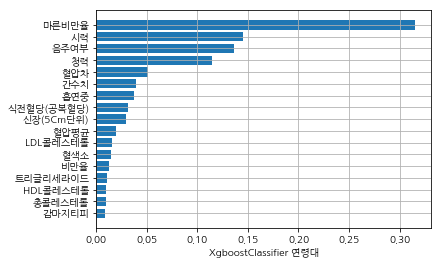

In [48]:
sorted_idx = XGBreg_age.feature_importances_.argsort()
plt.barh(train_X_cust_age.columns[sorted_idx], XGBreg_age.feature_importances_[sorted_idx])
plt.xlabel("XgboostClassifier 연령대")

Text(0.5, 0, 'XgboostClassifier 연령대')

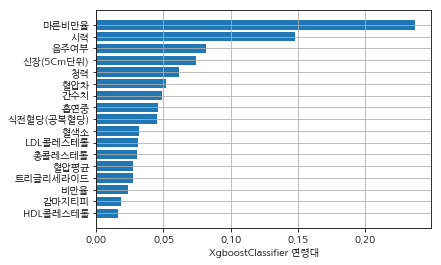

In [49]:
sorted_idx = XGBclas_age.feature_importances_.argsort()
plt.barh(train_X_cust_age.columns[sorted_idx], XGBclas_age.feature_importances_[sorted_idx])
plt.xlabel("XgboostClassifier 연령대")

Text(0.5, 0, 'XGBoostClassifier 성별')

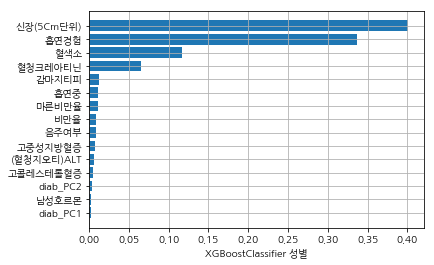

In [50]:
sorted_idx = XGBclas_gen.feature_importances_.argsort()
plt.barh(train_X_cust_gen.columns[sorted_idx], XGBclas_gen.feature_importances_[sorted_idx])
plt.xlabel("XGBoostClassifier 성별")